In [33]:
library(ggplot2)
library(dplyr)
library(forcats)
library(stringr)

In [2]:
install.packages("ggplot2")

In [3]:
dir_path <- "ds_value/"
species <-c("Pgt21", "Pst134E", "Pt76", "Pca203")

In [270]:
for (s in species){
    file_name<-paste0(s, "_merged_analysed_alleles.df")
    if (file.exists(paste0(dir_path, file_name))){
        tmp1<-read.table(paste0(dir_path, file_name), header = TRUE , sep="\t" )
        tmp1<-dplyr::filter(tmp1, grepl('chr', Contig))
        tmp2<-tmp1 %>%
            group_by(Contig) %>%
            summarize("95 quantile" = quantile(yn00_dS, 0.95),
                     "99 quantile" = quantile(yn00_dS, 0.99),
                      "75 quantile"  = quantile(yn00_dS, 0.75),
                    mean = mean(yn00_dS))
        tmp3<-merge(tmp1, tmp2, by=c("Contig"), all = TRUE)
        tmp3<-tmp3[tmp3$yn00_dS > tmp3$q3, ]
        assign(paste0(s, "_outlier"), tmp3)
        assign(paste0(s, "_ds_table") , tmp1)
        assign(paste0(s, "_summary") ,  tmp2)
    }
}

In [168]:
mylist <-""
for (i in seq(1, 18, by=1)){
    tmp1<- paste0("chr",i)
    mylist <- c(mylist, tmp1)
}
Pgt21_summary<- Pgt21_summary %>%
  mutate(Contig =  factor(Contig, levels = mylist)) %>%
  arrange(Contig) %>%
  mutate(xmin = seq(0.5, 17.5, by = 1)) %>%
  mutate(xmax = seq(1.5, 18.5, by = 1)) %>%
  mutate(ymin = seq(1, 18, by = 1))
  

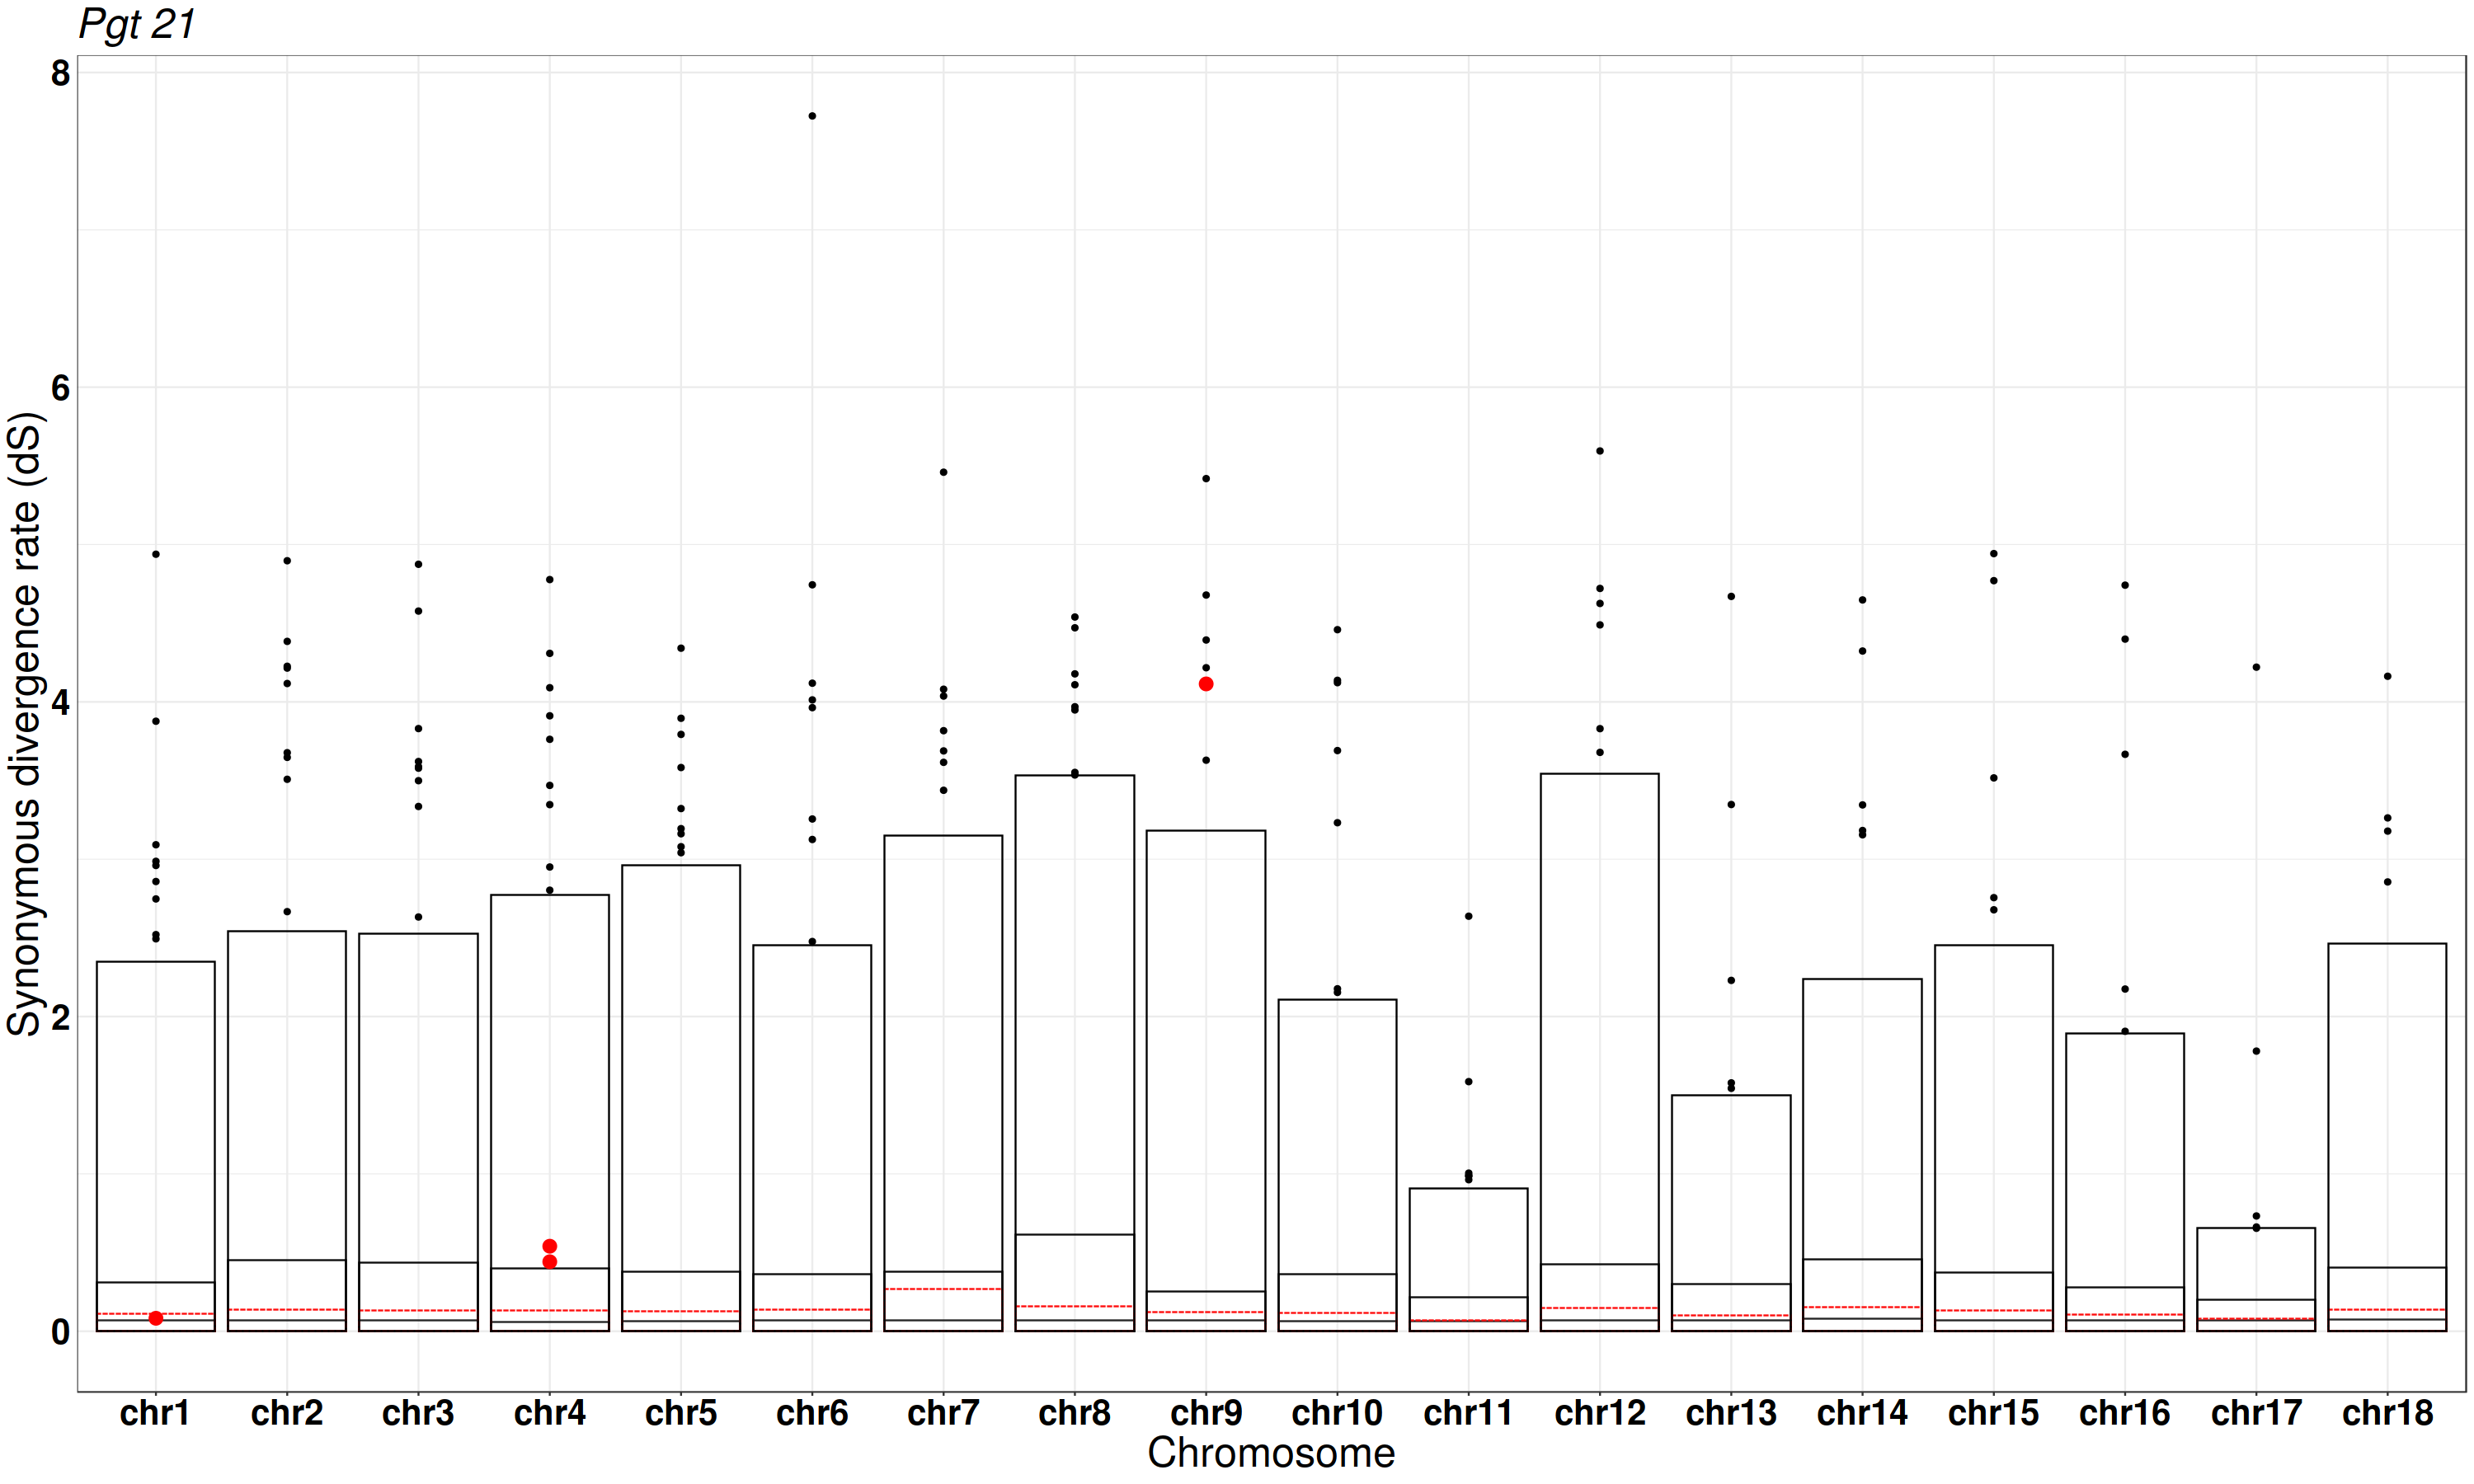

In [113]:
mylist <-""
for (i in seq(1, 18, by=1)){
    tmp1<- paste0("chr",i)
    mylist <- c(mylist, tmp1)
}
options(repr.plot.width=25, repr.plot.height=15)
Pgt21_summary$Contig <-factor(Pgt21_summary$Contig, levels = mylist)
ggplot(data = Pgt21_summary, aes(x = Contig, y = q2)) + geom_bar(stat='identity', colour="black", alpha=0.05, fill="white") +
    geom_bar(data = Pgt21_summary, aes(x = Contig, y = q1), stat='identity', colour="black", alpha=0.05, fill="white") +
    geom_bar(data = Pgt21_summary, aes(x = Contig, y = mean), stat='identity', colour="#FF0000", alpha=0.05, fill="white", linetype = "dashed") +    
    geom_bar(data = Pgt21_summary, aes(x = Contig, y = q3), stat='identity', colour="black", alpha=0.05, fill="white") +
    geom_point(data = Pgt21_outlier[Pgt21_outlier$yn00_dS <80, ] , aes(x = Contig, y= yn00_dS)) + theme_bw()+ 
                    theme(text = element_text(size=30), legend.position=c(.99,.01), legend.justification=c(1,0),
                     strip.background=element_blank(), axis.ticks.y=element_blank(),
                        axis.text.x = element_text(size=25, face="bold", colour = "black"),
                        axis.text.y = element_text(size=25, face="bold", colour = "black"),
                         plot.title = element_text(color="black", size=30, face = "italic"))+
        ggtitle("Pgt 21") + xlab("Chromosome") + ylab("Synonymous divergence rate (dS)") +
        annotate(geom = "point", y =Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_12336",]$yn00_dS , x=Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_12336",]$Contig, colour="red", size=4)+
        annotate(geom = "point", y =Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_12337",]$yn00_dS , x=Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_12337",]$Contig,  colour="red", size=4)+
        annotate(geom = "point", y =Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_17723",]$yn00_dS , x=Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_17723",]$Contig,  colour="red", size=4)+
        annotate(geom = "point", y =Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_984",]$yn00_dS , x=Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_984",]$Contig,  colour="red", size=4)   

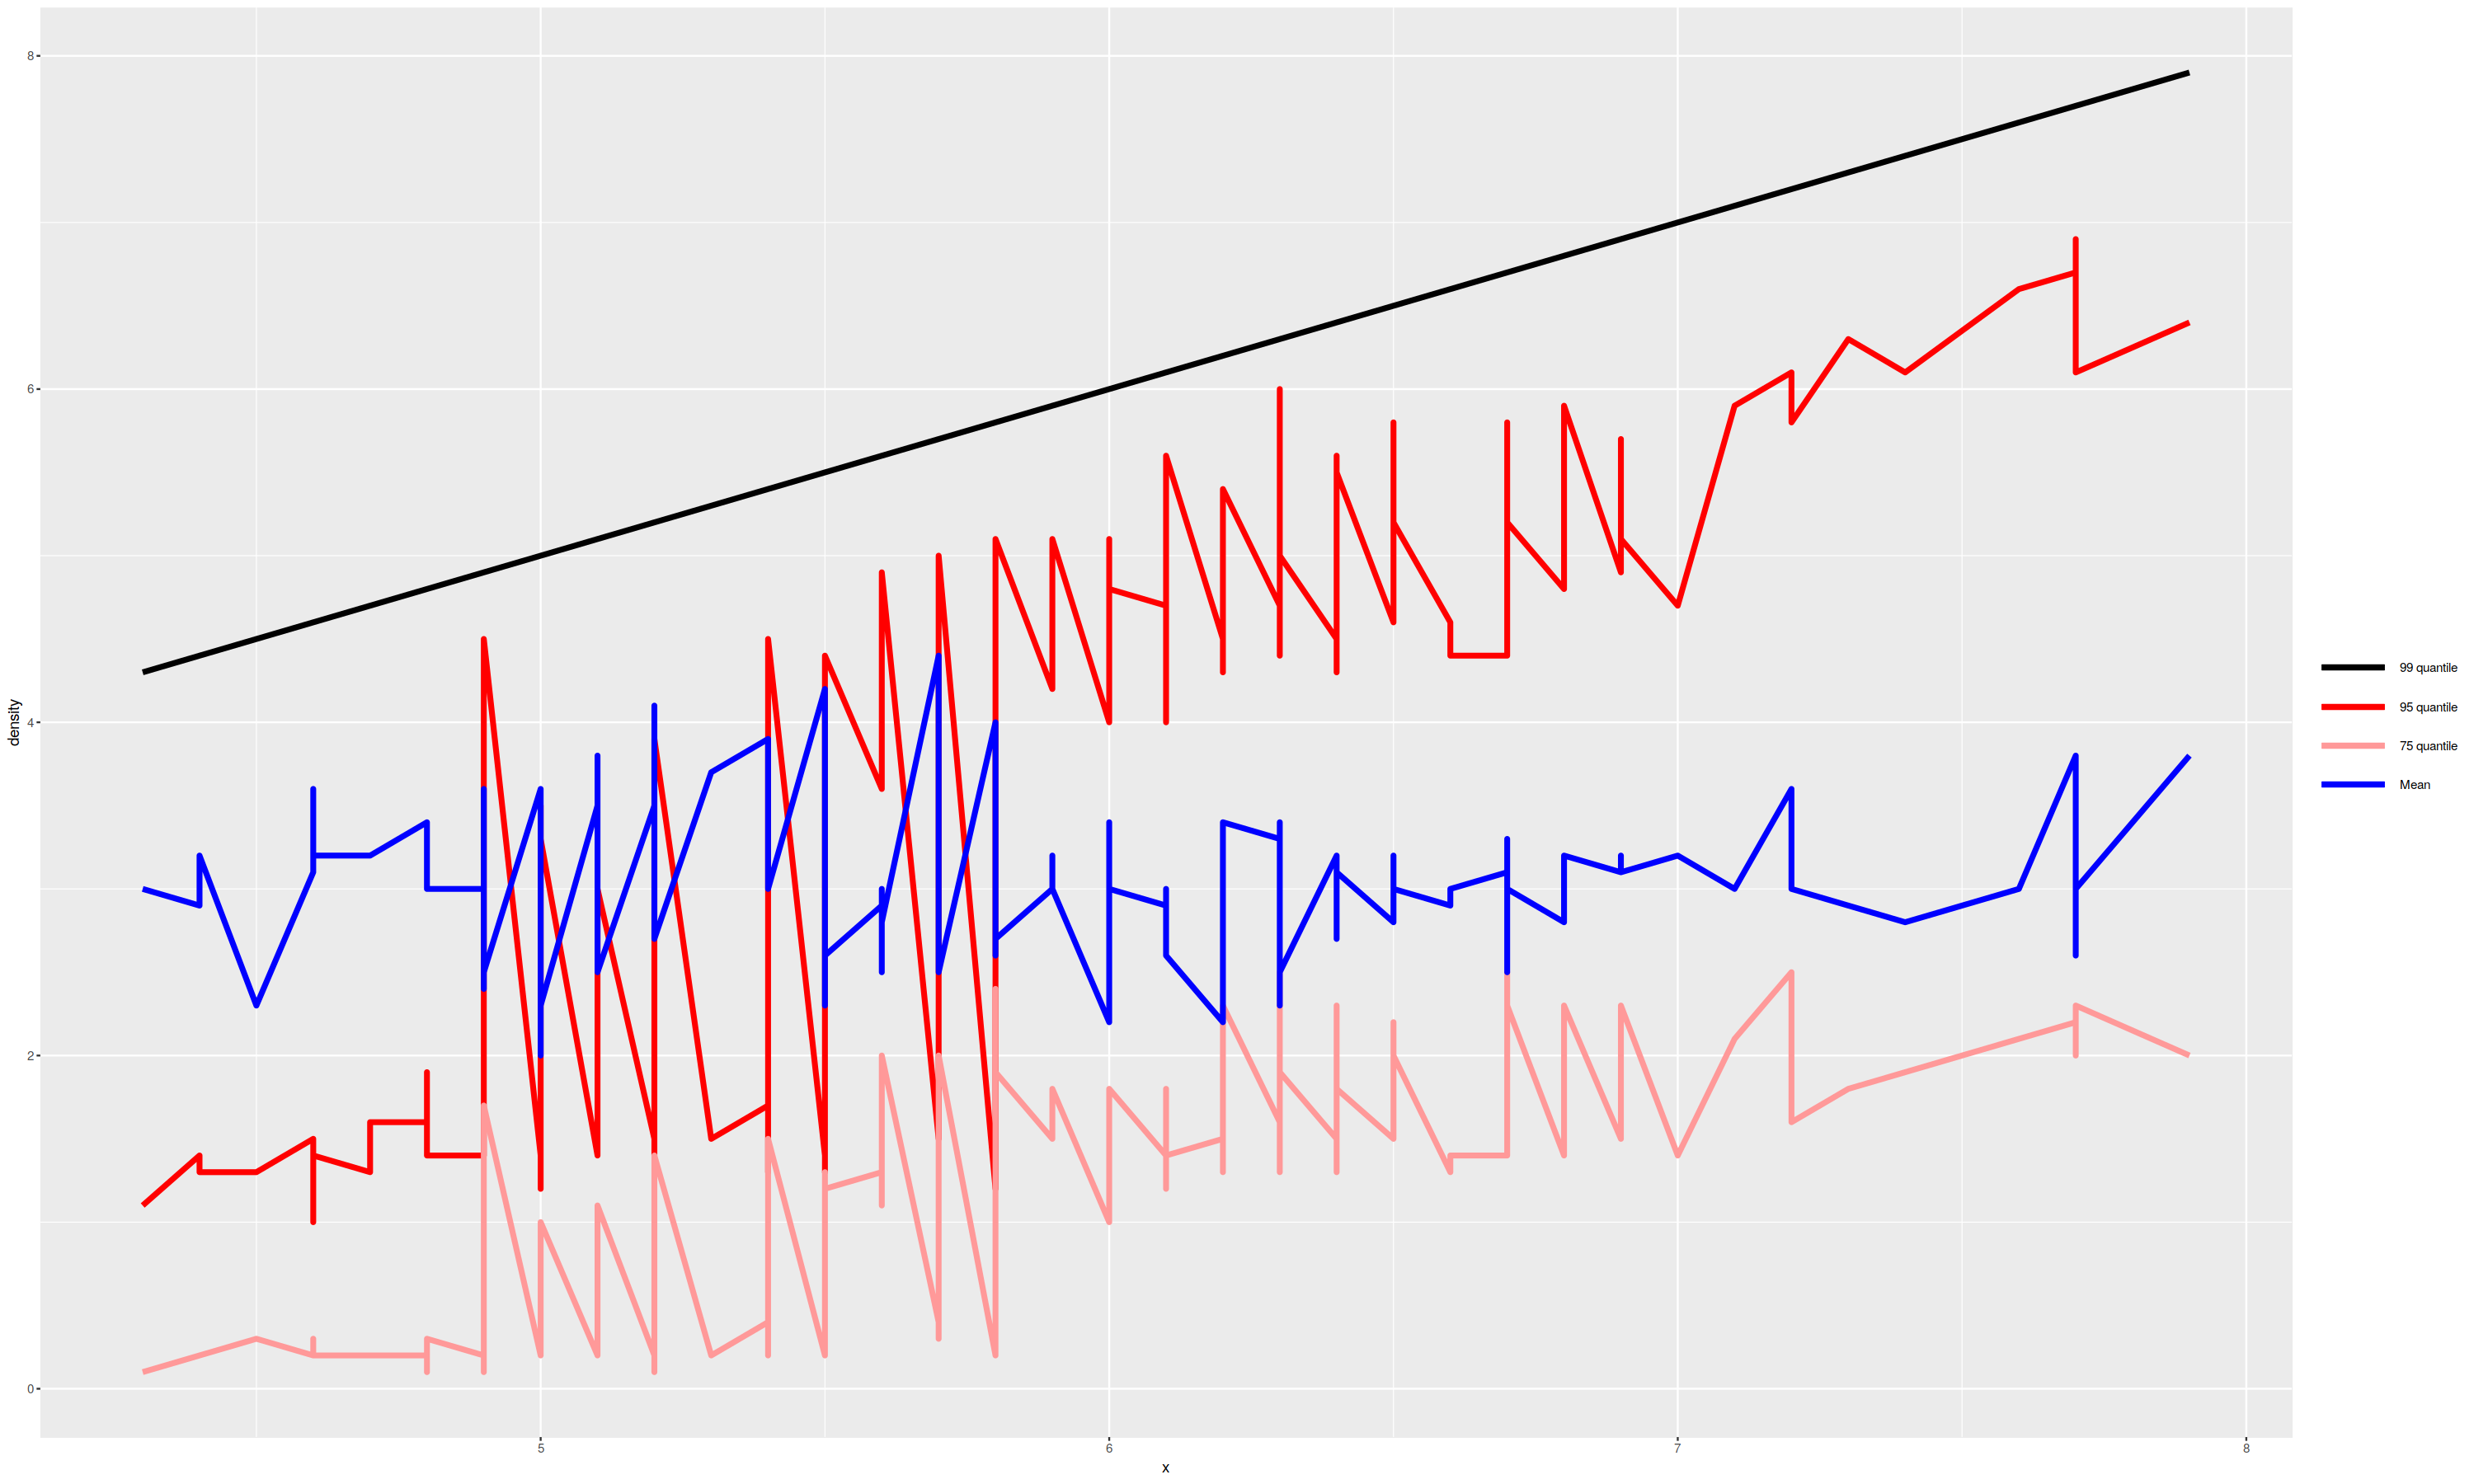

In [272]:
#colors <- c("quantile99" = "#660000", "quantile95" = "#FF0000", "quantile75" = "FF9999", "mean"= "#0000FF")
#tmp<-c("quantile99" = 1, "quantile95" = 1, "quantile75" = 1, "mean"= 1)
#ggplot()+geom_bar(data=tmp, aes())
colors <- c("Sepal Width" = "blue", "Petal Length" = "red", "Petal Width" = "orange")
options(repr.plot.width=25, repr.plot.height=15)
ggplot(iris, aes(x=Sepal.Length)) +geom_line(data=iris, aes(y = Sepal.Length, color = "black"), size = 1.5) +
    geom_line(data=iris, aes(y = Petal.Length, color = "#FF0000"), size = 1.5) +
    geom_line(data=iris, aes(y = Petal.Width, color = "#FF9999"), size = 1.5) +
    geom_line(data=iris, aes(y = Sepal.Width, color = "#0000FF"), size = 1.5) +
    xlab('x')+ylab('density') + 
    scale_colour_manual(name = 'Legend', 
         values =c('black'='black','#FF0000'='#FF0000', '#FF9999'= '#FF9999', '#0000FF'='#0000FF'), labels = c('99 quantile','95 quantile','75 quantile','Mean'))+
theme(legend.key.height = unit(1, 'cm'), legend.key.width = unit(2, 'cm'), legend.title=element_blank(), 
     legend.key = element_rect(colour = NA, fill = NA))

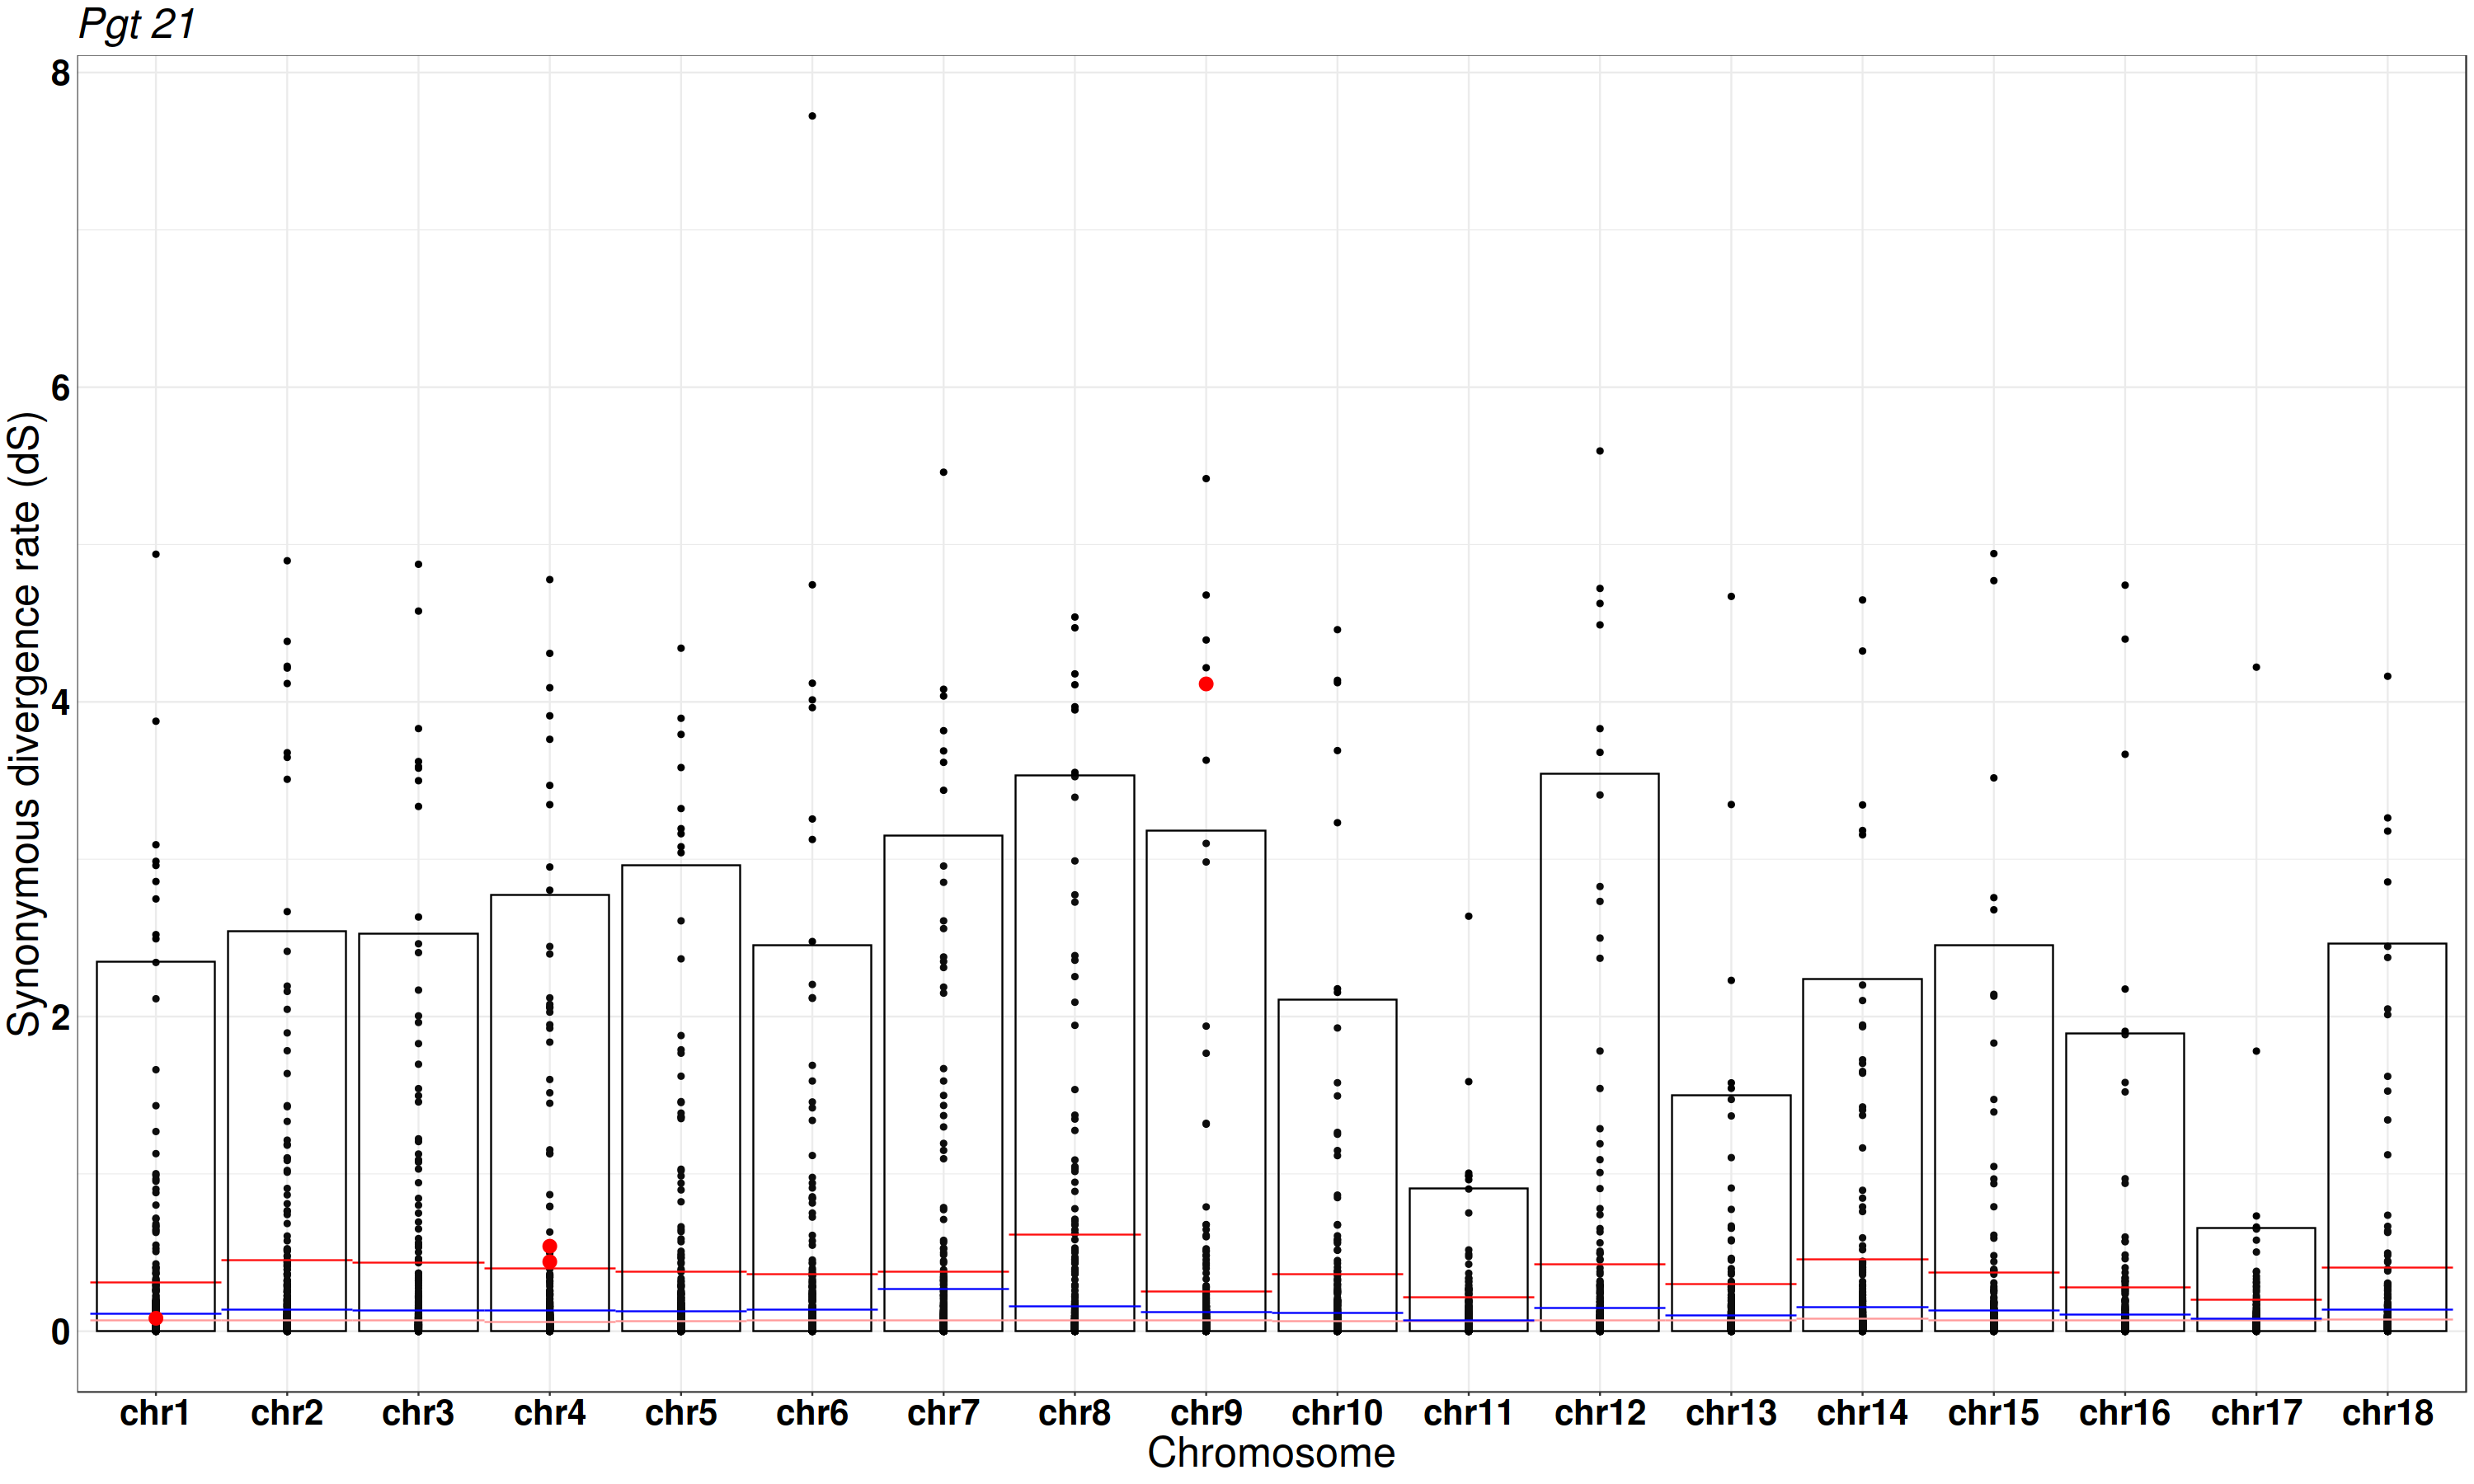

In [244]:
mylist <-""
for (i in seq(1, 18, by=1)){
    tmp1<- paste0("chr",i)
    mylist <- c(mylist, tmp1)
}
Pgt21_summary<- Pgt21_summary %>%
  mutate(Contig =  factor(Contig, levels = mylist)) %>%
  arrange(Contig) %>%
  mutate(xmin = seq(0.5, 17.5, by = 1)) %>%
  mutate(xmax = seq(1.5, 18.5, by = 1)) %>%
  mutate(ymin = seq(1, 18, by = 1)) 
Pgt21_ds_table<-Pgt21_ds_table %>%
  mutate(Contig =  factor(Contig, levels = mylist))
colors <- c("99 quantile" = "#660000", "95 quantile" = "#FF0000", "75 quantile" = "FF9999", "mean"= "#0000FF")
ggplot(data = Pgt21_ds_table[Pgt21_ds_table$yn00_dS <80, ], aes(x = Contig, y = yn00_dS)) + geom_point(stat='identity', colour="black", fill="white") +
    geom_segment(data = Pgt21_summary, aes(x = xmin, xend = xmax, y = get("95 quantile"), yend = get("95 quantile")), colour="#FF0000") +
#    geom_segment(data = Pgt21_summary, aes(x = xmin, xend = xmax, y = get("99 quantile"), yend = get("99 quantile")), colour="#660000") +
    geom_bar(data = Pgt21_summary, aes(x = Contig, y = get("99 quantile")), stat='identity', colour="black", alpha=0.05, fill="white") +
    geom_segment(data = Pgt21_summary, aes(x = xmin, xend = xmax, y = get("75 quantile"), yend = get("75 quantile")), colour="#FF9999") + 
    geom_segment(data = Pgt21_summary, aes(x = xmin, xend = xmax, y = mean, yend = mean), colour="#0000FF") + theme_bw()+ 
                    theme(text = element_text(size=30), legend.position=c(.99,.01), legend.justification=c(1,0),
                     strip.background=element_blank(), axis.ticks.y=element_blank(),
                        axis.text.x = element_text(size=25, face="bold", colour = "black"),
                        axis.text.y = element_text(size=25, face="bold", colour = "black"),
                         plot.title = element_text(color="black", size=30, face = "italic"))+
        ggtitle("Pgt 21") + labs(x = "Chromosome", y = "Synonymous divergence rate (dS)") +
        annotate(geom = "point", y =Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_12336",]$yn00_dS , x=Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_12336",]$Contig, colour="red", size=4)+
        annotate(geom = "point", y =Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_12337",]$yn00_dS , x=Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_12337",]$Contig,  colour="red", size=4)+
        annotate(geom = "point", y =Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_17723",]$yn00_dS , x=Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_17723",]$Contig,  colour="red", size=4)+
        annotate(geom = "point", y =Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_984",]$yn00_dS , x=Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_984",]$Contig,  colour="red", size=4)

In [269]:
Pt76_ds_table

X,Target,evalue_ab,bitscore_ab,evalue_ba,bitscore_ba,same_strand,simscore,Index,protein_hamming,⋯,yn00_dS,yn00_dN,Contig,annotation,feature,start,end,factor,strand,factor2
<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<dbl>,⋯,<dbl>,<dbl>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
0,Pt76_000002,0.000000e+00,1146,0.000000e+00,1146,1,1.0000000,Pt76_000002_Pt76_000856,0.0017,⋯,0.0000,0.0008,NA,funannotate,CDS,10561,14114,.,-,.
1,Pt76_000003,0.000000e+00,3061,0.000000e+00,3061,1,1.0000000,Pt76_000003_Pt76_000857,0.0013,⋯,0.0016,0.0006,NA,funannotate,CDS,14046,19729,.,-,.
2,Pt76_000004,0.000000e+00,1582,0.000000e+00,1583,1,1.0000000,Pt76_000004_Pt76_000858,0.0036,⋯,0.0000,0.0017,NA,funannotate,CDS,19730,23408,.,+,.
3,Pt76_000005,0.000000e+00,1596,0.000000e+00,1598,1,1.0000000,Pt76_000005_Pt76_000859,0.1507,⋯,0.0086,0.0006,NA,funannotate,CDS,24814,30271,.,+,.
4,Pt76_000006,0.000000e+00,1834,0.000000e+00,1835,1,1.0000000,Pt76_000006_Pt76_000860,0.0137,⋯,0.0120,0.0063,NA,funannotate,CDS,36482,41096,.,+,.
5,Pt76_000007,0.000000e+00,1067,0.000000e+00,1065,1,1.0000000,Pt76_000007_Pt76_000861,0.0049,⋯,0.0131,0.0025,NA,funannotate,CDS,50576,52952,.,+,.
6,Pt76_000008,0.000000e+00,1204,0.000000e+00,1205,1,1.0000000,Pt76_000008_Pt76_000862,0.3554,⋯,0.0082,0.0015,NA,funannotate,CDS,54076,58407,.,+,.
7,Pt76_000009,0.000000e+00,4266,0.000000e+00,4266,1,1.0000000,Pt76_000009_Pt76_000863,0.0000,⋯,0.0010,0.0000,NA,funannotate,CDS,67526,75605,.,+,.
8,Pt76_000011,8.140000e-80,228,1.160000e-79,228,1,1.0000000,Pt76_000011_Pt76_000864,0.0087,⋯,0.0094,0.0042,NA,funannotate,CDS,94248,95601,.,-,.


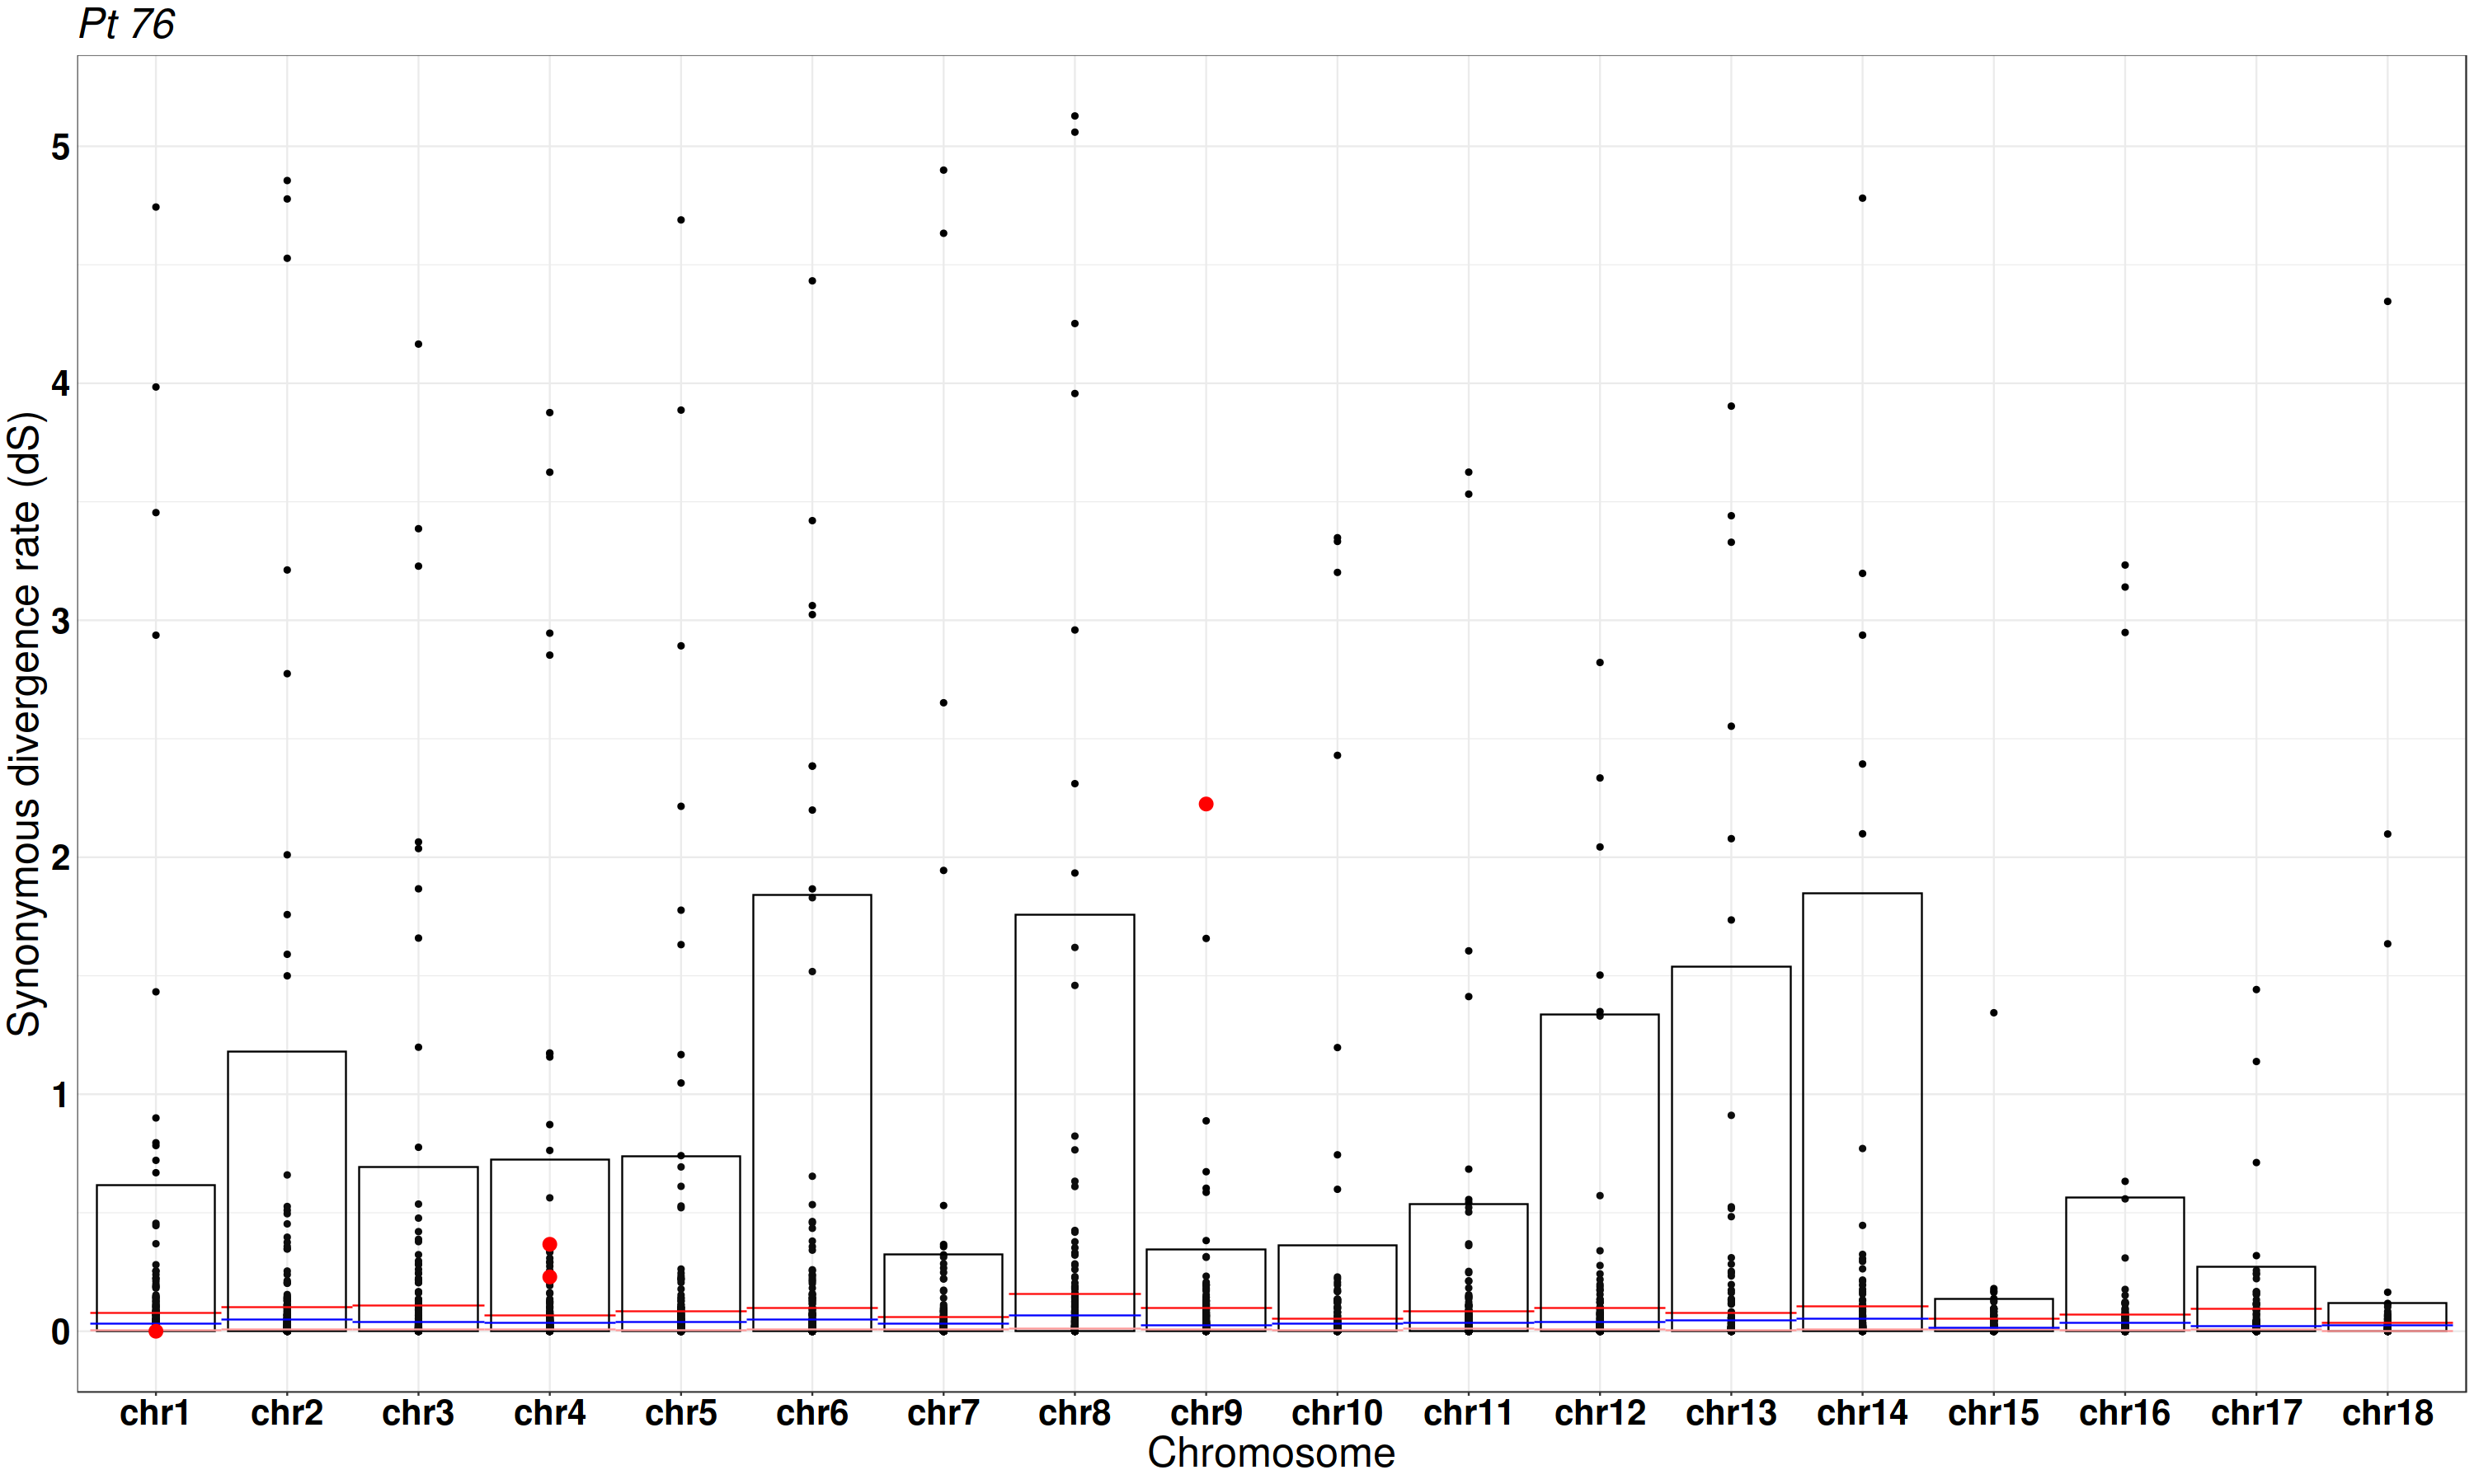

In [271]:
levels(Pt76_summary$Contig) <- sub("A", "", levels(Pt76_summary$Contig))
levels(Pt76_ds_table$Contig) <- sub("A", "", levels(Pt76_ds_table$Contig))
mylist <-""
for (i in seq(1, 18, by=1)){
    tmp1<- paste0("chr",i)
    mylist <- c(mylist, tmp1)
}
Pt76_summary<- Pt76_summary %>%
  mutate(Contig =  factor(Contig, levels = mylist)) %>%
  arrange(Contig) %>%
  mutate(xmin = seq(0.5, 17.5, by = 1)) %>%
  mutate(xmax = seq(1.5, 18.5, by = 1)) %>%
  mutate(ymin = seq(1, 18, by = 1)) 
Pt76_ds_table<-Pt76_ds_table %>%
  mutate(Contig =  factor(Contig, levels = mylist))
options(repr.plot.width=25, repr.plot.height=15)
ggplot(data = Pt76_ds_table, aes(x = Contig, y = yn00_dS)) + geom_point(stat='identity', colour="black", fill="white") +
    geom_segment(data = Pt76_summary, aes(x = xmin, xend = xmax, y = get("95 quantile"), yend = get("95 quantile")), colour="#FF0000") +
#    geom_segment(data = Pt76_summary, aes(x = xmin, xend = xmax, y = get("99 quantile"), yend = get("99 quantile")), colour="#660000") +
    geom_bar(data = Pt76_summary, aes(x = Contig, y = get("99 quantile")), stat='identity', colour="black", alpha=0.05, fill="white") +
    geom_segment(data = Pt76_summary, aes(x = xmin, xend = xmax, y = get("75 quantile"), yend = get("75 quantile")), colour="#FF9999") + 
    geom_segment(data = Pt76_summary, aes(x = xmin, xend = xmax, y = mean, yend = mean), colour="#0000FF") + theme_bw()+
                    theme(text = element_text(size=30), legend.position=c(.99,.01), legend.justification=c(1,0),
                     strip.background=element_blank(), axis.ticks.y=element_blank(),
                        axis.text.x = element_text(size=25, face="bold", colour = "black"),
                        axis.text.y = element_text(size=25, face="bold", colour = "black"),
                         plot.title = element_text(color="black", size=30, face = "italic"))+
        ggtitle("Pt 76") + labs(x = "Chromosome", y = "Synonymous divergence rate (dS)") +
        annotate(geom = "point", y =Pt76_ds_table[Pt76_ds_table$Target == "Pt76_019208",]$yn00_dS , x=Pt76_ds_table[Pt76_ds_table$Target == "Pt76_019208",]$Contig, colour="red", size=4)+
        annotate(geom = "point", y =Pt76_ds_table[Pt76_ds_table$Target == "Pt76_019207",]$yn00_dS , x=Pt76_ds_table[Pt76_ds_table$Target == "Pt76_019207",]$Contig, colour="red", size=4)+
        annotate(geom = "point", y =Pt76_ds_table[Pt76_ds_table$Target == "Pt76_028748",]$yn00_dS , x=Pt76_ds_table[Pt76_ds_table$Target == "Pt76_028748",]$Contig, colour="red", size=4)+
        annotate(geom = "point", y =Pt76_ds_table[Pt76_ds_table$Target == "Pt76_012571",]$yn00_dS , x=Pt76_ds_table[Pt76_ds_table$Target == "Pt76_012571",]$Contig, colour="red", size=4)

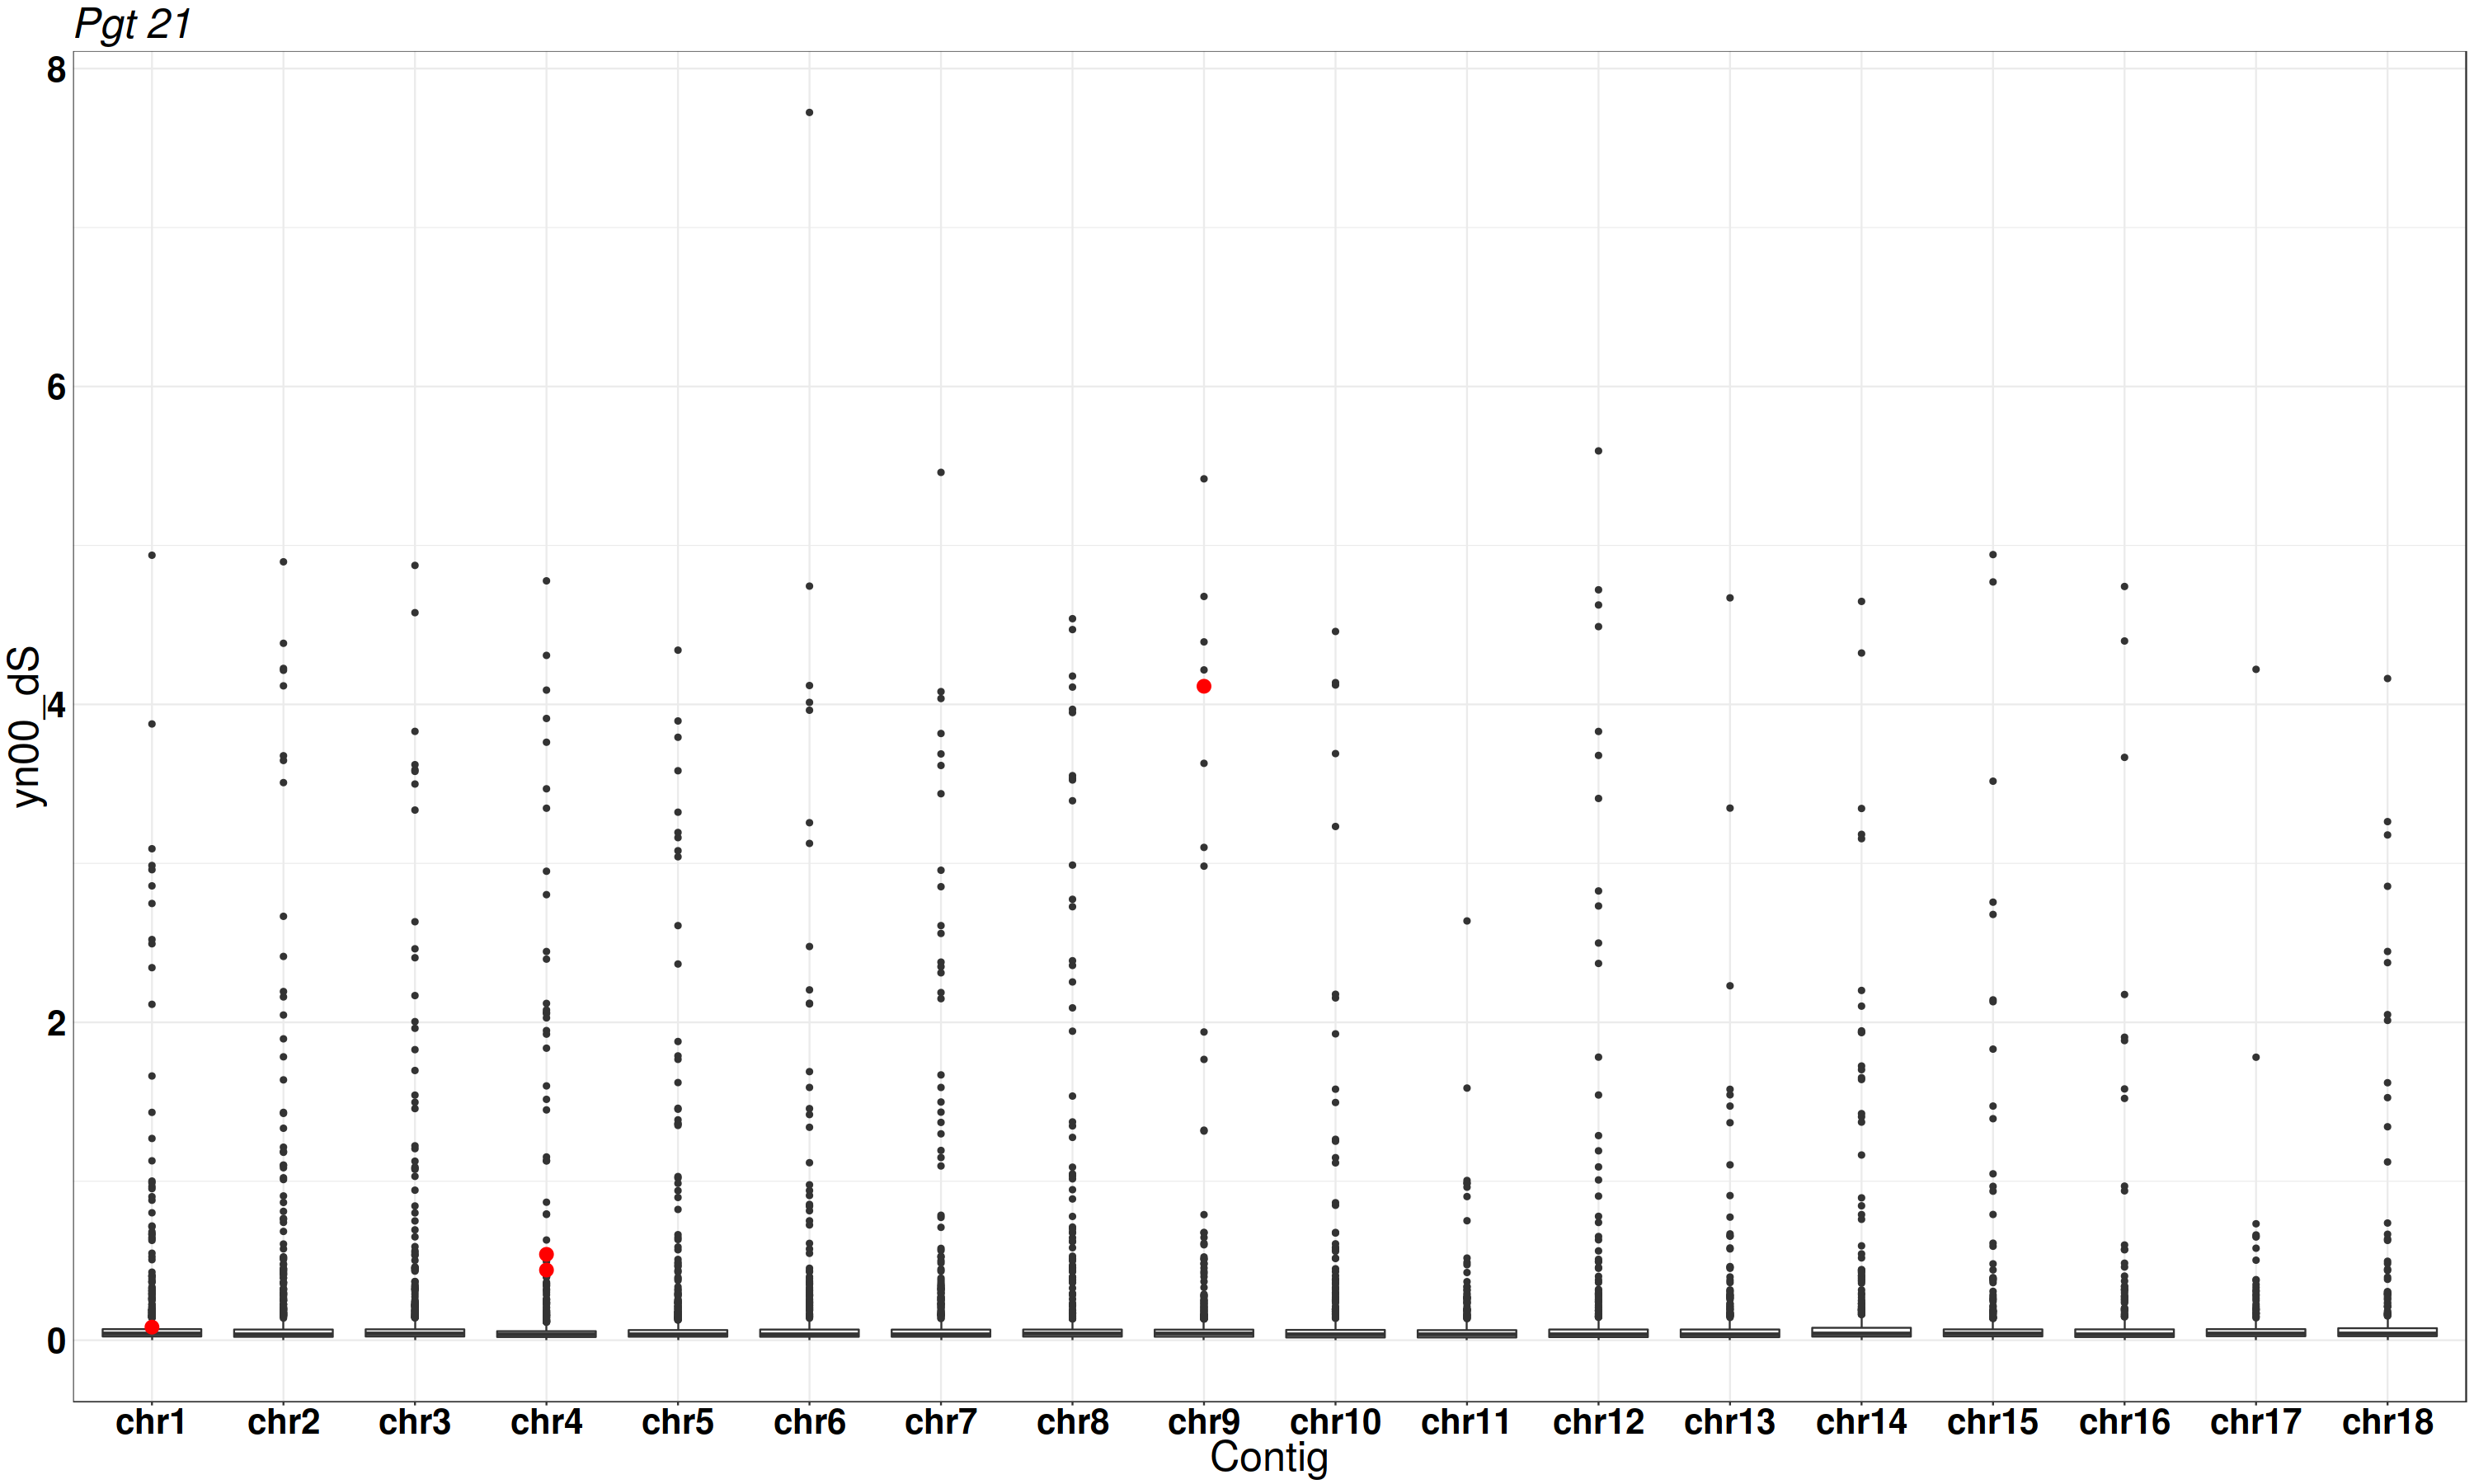

In [50]:
Pgt21_ds_table<-dplyr::filter(Pgt21_ds_table, grepl('chr', Contig))
mylist <-""
for (i in seq(1, 18, by=1)){
    tmp1<- paste0("chr",i)
    mylist <- c(mylist, tmp1)
}
options(repr.plot.width=25, repr.plot.height=15)
Pgt21_ds_table$Contig <-factor(Pgt21_ds_table$Contig, levels = mylist)
ggplot(Pgt21_ds_table[Pgt21_ds_table$yn00_dS<80,], aes(y=yn00_dS, x=Contig))+ geom_boxplot() + theme_bw()+ 
                    theme(text = element_text(size=30), legend.position=c(.99,.01), legend.justification=c(1,0),
                     strip.background=element_blank(), axis.ticks.y=element_blank(),
                        axis.text.x = element_text(size=25, face="bold", colour = "black"),
                        axis.text.y = element_text(size=25, face="bold", colour = "black"),
                         plot.title = element_text(color="black", size=30, face = "italic"))+
        ggtitle("Pgt 21") +
        annotate(geom = "point", y =Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_12336",]$yn00_dS , x=Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_12336",]$Contig, colour="red", size=4)+
        annotate(geom = "point", y =Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_12337",]$yn00_dS , x=Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_12337",]$Contig,  colour="red", size=4)+
        annotate(geom = "point", y =Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_17723",]$yn00_dS , x=Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_17723",]$Contig,  colour="red", size=4)+
        annotate(geom = "point", y =Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_984",]$yn00_dS , x=Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_984",]$Contig,  colour="red", size=4)

Pgt21_ds_table<-dplyr::filter(Pgt21_ds_table, grepl('chr', Contig))
mylist <-""
for (i in seq(1, 18, by=1)){
    tmp1<- paste0("chr_",i)
    mylist <- c(mylist, tmp1)
}
options(repr.plot.width=20, repr.plot.height=15)
Pgt21_ds_table$Contig <-factor(Pgt21_ds_table$Contig, levels = mylist)
ggplot(Pgt21_ds_table[Pgt21_ds_table$yn00_dS<80,], aes(x=yn00_dS, y=Contig))+ geom_violin() + scale_y_discrete(limits=rev)+ theme_bw()+ 
                    theme(text = element_text(size=30), legend.position=c(.99,.01), legend.justification=c(1,0),
                     strip.background=element_blank(), axis.ticks.y=element_blank(),
                        axis.text.x = element_text(size=25, face="bold", colour = "black"),
                        axis.text.y = element_text(size=25, face="bold", colour = "black"),
                         plot.title = element_text(color="black", size=30, face = "italic"))+
        ggtitle("Pgt 21") +
        annotate(geom = "point", x =Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_12336",]$yn00_dS , y=Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_12336",]$Contig)+
        annotate(geom = "point", x =Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_12337",]$yn00_dS , y=Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_12337",]$Contig)+
        annotate(geom = "point", x =Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_17723",]$yn00_dS , y=Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_17723",]$Contig)+
        annotate(geom = "point", x =Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_984",]$yn00_dS , y=Pgt21_ds_table[Pgt21_ds_table$Target == "Pgt_21B_984",]$Contig)

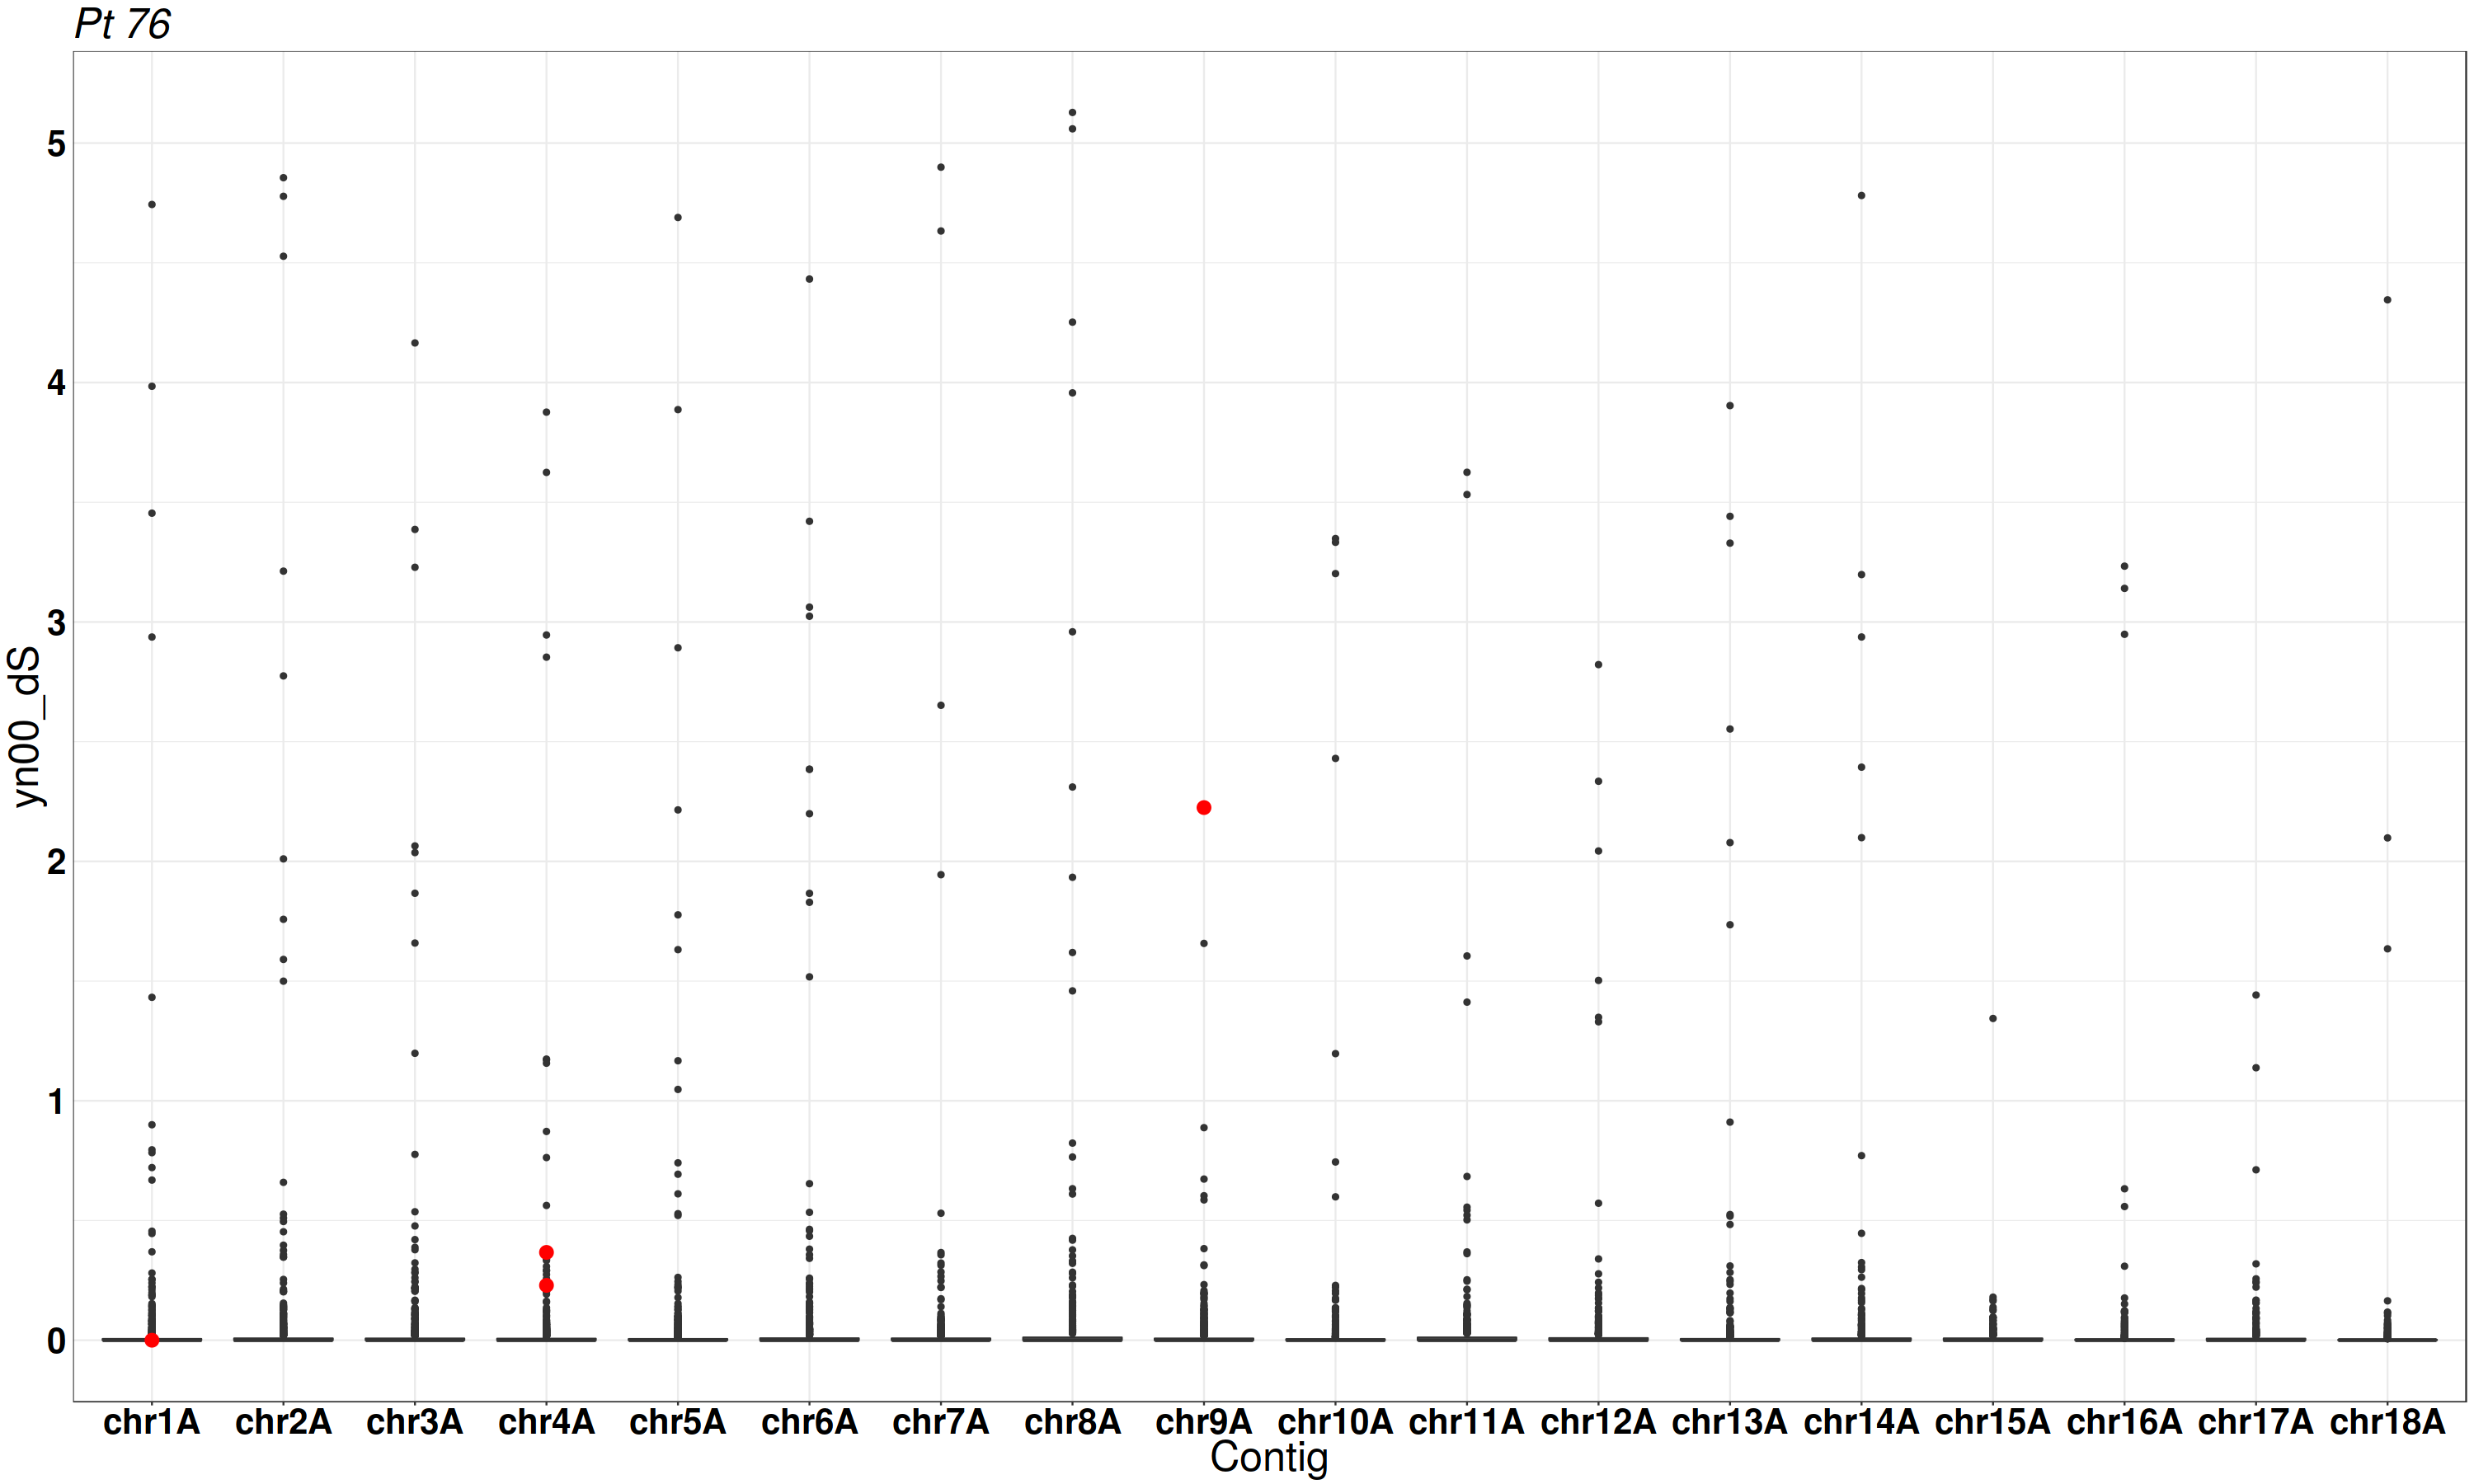

In [51]:
mylist <-""
for (i in seq(1, 18, by=1)){
    tmp1<- paste0("chr",i,"A")
    mylist <- c(mylist, tmp1)
}
options(repr.plot.width=25, repr.plot.height=15)
Pt76_ds_table$Contig <-factor(Pt76_ds_table$Contig, levels = mylist)
ggplot(Pt76_ds_table, aes(y=yn00_dS, x=Contig))+ geom_boxplot() + theme_bw()+ 
                    theme(text = element_text(size=30), legend.position=c(.99,.01), legend.justification=c(1,0),
                     strip.background=element_blank(), axis.ticks.y=element_blank(),
                        axis.text.x = element_text(size=25, face="bold", colour = "black"),
                        axis.text.y = element_text(size=25, face="bold", colour = "black"),
                         plot.title = element_text(color="black", size=30, face = "italic"))+
        ggtitle("Pt 76") +
        annotate(geom = "point", y =Pt76_ds_table[Pt76_ds_table$Target == "Pt76_019208",]$yn00_dS , x=Pt76_ds_table[Pt76_ds_table$Target == "Pt76_019208",]$Contig, colour="red", size=4)+
        annotate(geom = "point", y =Pt76_ds_table[Pt76_ds_table$Target == "Pt76_019207",]$yn00_dS , x=Pt76_ds_table[Pt76_ds_table$Target == "Pt76_019207",]$Contig, colour="red", size=4)+
        annotate(geom = "point", y =Pt76_ds_table[Pt76_ds_table$Target == "Pt76_028748",]$yn00_dS , x=Pt76_ds_table[Pt76_ds_table$Target == "Pt76_028748",]$Contig, colour="red", size=4)+
        annotate(geom = "point", y =Pt76_ds_table[Pt76_ds_table$Target == "Pt76_012571",]$yn00_dS , x=Pt76_ds_table[Pt76_ds_table$Target == "Pt76_012571",]$Contig, colour="red", size=4)

mylist <-""
for (i in seq(1, 18, by=1)){
    tmp1<- paste0("chr",i,"_A")
    mylist <- c(mylist, tmp1)
}
options(repr.plot.width=20, repr.plot.height=15)
Pt76_ds_table$Contig <-factor(Pt76_ds_table$Contig, levels = mylist)
ggplot(Pt76_ds_table, aes(x=yn00_dS, y=Contig))+geom_violin() + scale_y_discrete(limits=rev)+ theme_bw()+ 
                    theme(text = element_text(size=30), legend.position=c(.99,.01), legend.justification=c(1,0),
                     strip.background=element_blank(), axis.ticks.y=element_blank(),
                        axis.text.x = element_text(size=25, face="bold", colour = "black"),
                        axis.text.y = element_text(size=25, face="bold", colour = "black"),
                         plot.title = element_text(color="black", size=30, face = "italic"))+
        ggtitle("Pt 76") +
        annotate(geom = "point", x =Pt76_ds_table[Pt76_ds_table$Target == "Pt76_019208",]$yn00_dS , y=Pt76_ds_table[Pt76_ds_table$Target == "Pt76_019208",]$Contig)+
        annotate(geom = "point", x =Pt76_ds_table[Pt76_ds_table$Target == "Pt76_019207",]$yn00_dS , y=Pt76_ds_table[Pt76_ds_table$Target == "Pt76_019207",]$Contig)+
        annotate(geom = "point", x =Pt76_ds_table[Pt76_ds_table$Target == "Pt76_028748",]$yn00_dS , y=Pt76_ds_table[Pt76_ds_table$Target == "Pt76_028748",]$Contig)+
        annotate(geom = "point", x =Pt76_ds_table[Pt76_ds_table$Target == "Pt76_012571",]$yn00_dS , y=Pt76_ds_table[Pt76_ds_table$Target == "Pt76_012571",]$Contig)

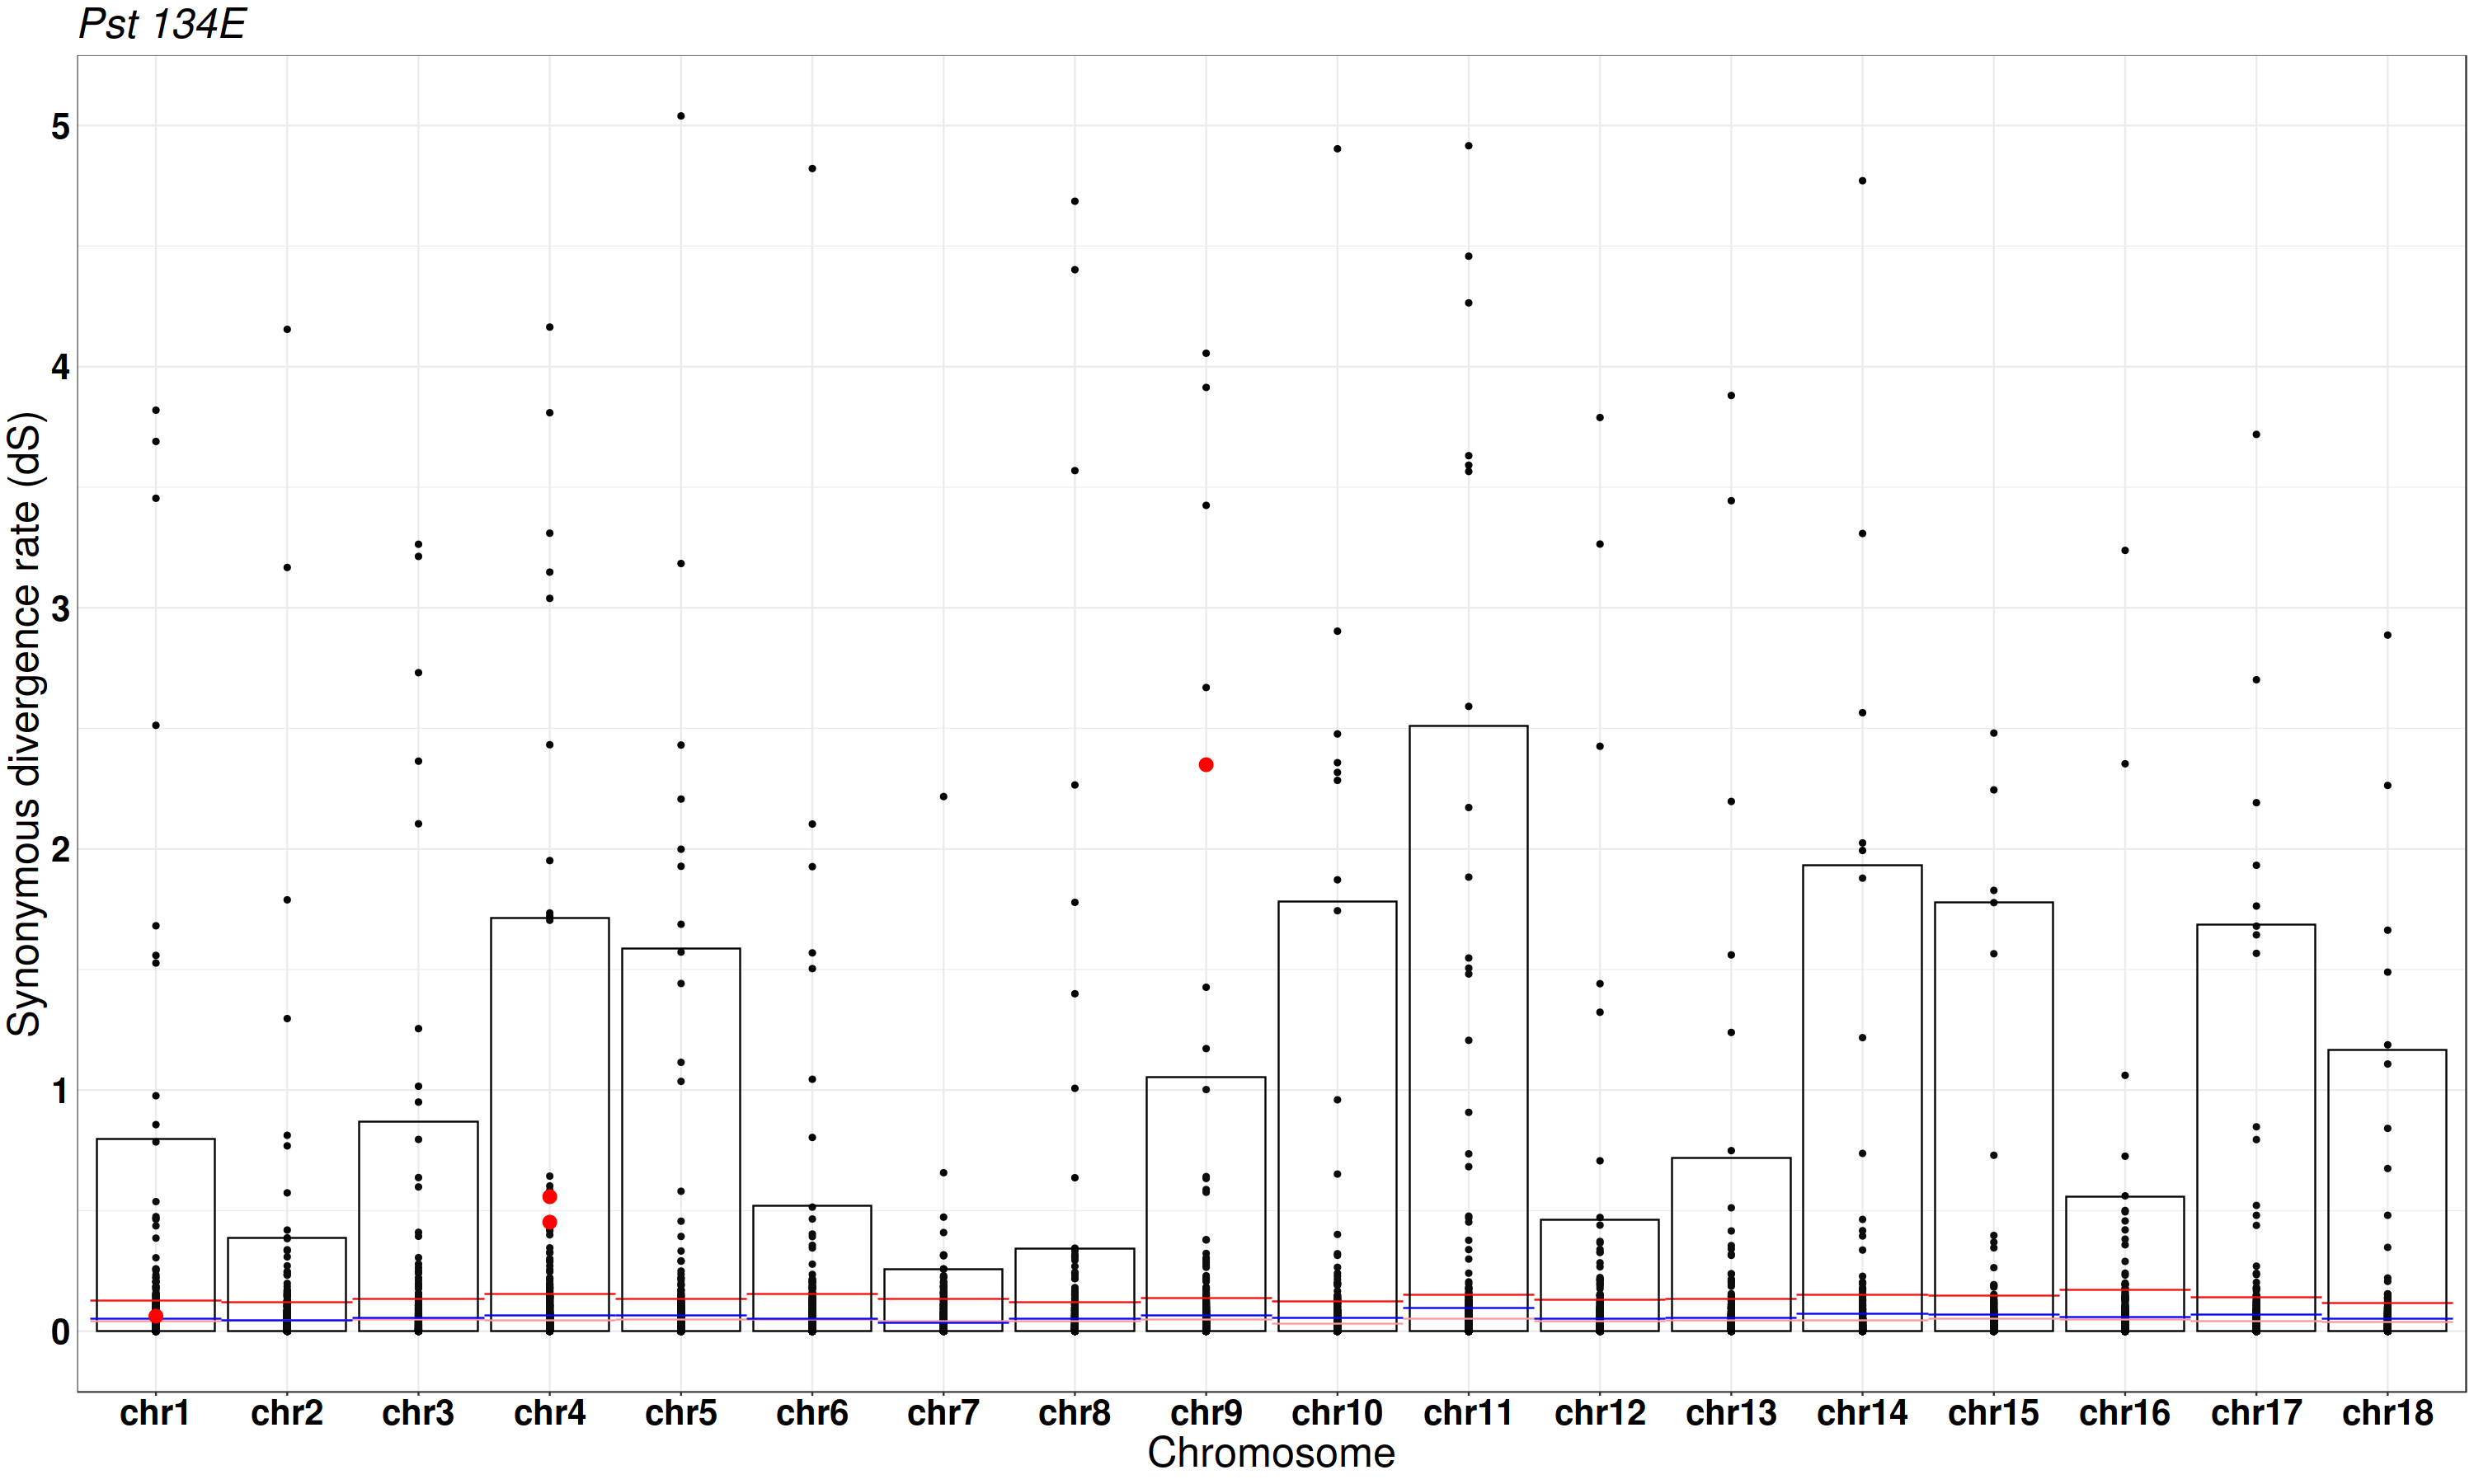

In [274]:
levels(Pst134E_summary$Contig) <- sub("A", "", levels(Pst134E_summary$Contig))
levels(Pst134E_ds_table$Contig) <- sub("A", "", levels(Pst134E_ds_table$Contig))
mylist <-""
for (i in seq(1, 18, by=1)){
    tmp1<- paste0("chr",i)
    mylist <- c(mylist, tmp1)
}
Pst134E_summary<- Pst134E_summary %>%
  mutate(Contig =  factor(Contig, levels = mylist)) %>%
  arrange(Contig) %>%
  mutate(xmin = seq(0.5, 17.5, by = 1)) %>%
  mutate(xmax = seq(1.5, 18.5, by = 1)) %>%
  mutate(ymin = seq(1, 18, by = 1)) 
Pst134E_ds_table<-Pst134E_ds_table %>%
  mutate(Contig =  factor(Contig, levels = mylist))
options(repr.plot.width=25, repr.plot.height=15)
ggplot(data = Pst134E_ds_table[Pst134E_ds_table$yn00_dS <80, ], aes(x = Contig, y = yn00_dS)) + geom_point(stat='identity', colour="black", fill="white") +
    geom_segment(data = Pst134E_summary, aes(x = xmin, xend = xmax, y = get("95 quantile"), yend = get("95 quantile")), colour="#FF0000") +
#    geom_segment(data = Pst134E_summary, aes(x = xmin, xend = xmax, y = get("99 quantile"), yend = get("99 quantile")), colour="#660000") +
    geom_bar(data = Pst134E_summary, aes(x = Contig, y = get("99 quantile")), stat='identity', colour="black", alpha=0.05, fill="white") +
    geom_segment(data = Pst134E_summary, aes(x = xmin, xend = xmax, y = get("75 quantile"), yend = get("75 quantile")), colour="#FF9999") + 
    geom_segment(data = Pst134E_summary, aes(x = xmin, xend = xmax, y = mean, yend = mean), colour="#0000FF") + theme_bw()+ 
                    theme(text = element_text(size=30), legend.position=c(.99,.01), legend.justification=c(1,0),
                     strip.background=element_blank(), axis.ticks.y=element_blank(),
                        axis.text.x = element_text(size=25, face="bold", colour = "black"),
                        axis.text.y = element_text(size=25, face="bold", colour = "black"),
                         plot.title = element_text(color="black", size=30, face = "italic"))+
        ggtitle("Pst 134E") + labs(x = "Chromosome", y = "Synonymous divergence rate (dS)")  +
        annotate(geom = "point", y =Pst134E_ds_table[Pst134E_ds_table$Target == "Pst134E_008630",]$yn00_dS , x=Pst134E_ds_table[Pst134E_ds_table$Target == "Pst134E_008630",]$Contig, colour="red", size=4)+
        annotate(geom = "point", y =Pst134E_ds_table[Pst134E_ds_table$Target == "Pst134E_008631",]$yn00_dS , x=Pst134E_ds_table[Pst134E_ds_table$Target == "Pst134E_008631",]$Contig, colour="red", size=4)+
        annotate(geom = "point", y =Pst134E_ds_table[Pst134E_ds_table$Target == "Pst134E_018609",]$yn00_dS , x=Pst134E_ds_table[Pst134E_ds_table$Target == "Pst134E_018609",]$Contig, colour="red", size=4)+
        annotate(geom = "point", y =Pst134E_ds_table[Pst134E_ds_table$Target == "Pst134E_002048",]$yn00_dS , x=Pst134E_ds_table[Pst134E_ds_table$Target == "Pst134E_002048",]$Contig, colour="red", size=4)

mylist <-""
for (i in seq(1, 18, by=1)){
    tmp1<- paste0("chr",i,"A")
    mylist <- c(mylist, tmp1)
}
options(repr.plot.width=20, repr.plot.height=15)
Pst134E_ds_table$Contig <-factor(Pst134E_ds_table$Contig, levels = mylist)
ggplot(Pst134E_ds_table, aes(x=yn00_dS, y=Contig))+geom_violin() + scale_y_discrete(limits=rev)+ theme_bw()+ 
                    theme(text = element_text(size=30), legend.position=c(.99,.01), legend.justification=c(1,0),
                     strip.background=element_blank(), axis.ticks.y=element_blank(),
                        axis.text.x = element_text(size=25, face="bold", colour = "black"),
                        axis.text.y = element_text(size=25, face="bold", colour = "black"),
                          plot.title = element_text(color="black", size=30, face = "italic"))+
        ggtitle("Pst 134E") +
        annotate(geom = "point", x =Pst134E_ds_table[Pst134E_ds_table$Target == "Pst134E_008630",]$yn00_dS , y=Pst134E_ds_table[Pst134E_ds_table$Target == "Pst134E_008630",]$Contig)+
        annotate(geom = "point", x =Pst134E_ds_table[Pst134E_ds_table$Target == "Pst134E_008631",]$yn00_dS , y=Pst134E_ds_table[Pst134E_ds_table$Target == "Pst134E_008631",]$Contig)+
        annotate(geom = "point", x =Pst134E_ds_table[Pst134E_ds_table$Target == "Pst134E_018609",]$yn00_dS , y=Pst134E_ds_table[Pst134E_ds_table$Target == "Pst134E_018609",]$Contig)+
        annotate(geom = "point", x =Pst134E_ds_table[Pst134E_ds_table$Target == "Pst134E_002048",]$yn00_dS , y=Pst134E_ds_table[Pst134E_ds_table$Target == "Pst134E_002048",]$Contig)

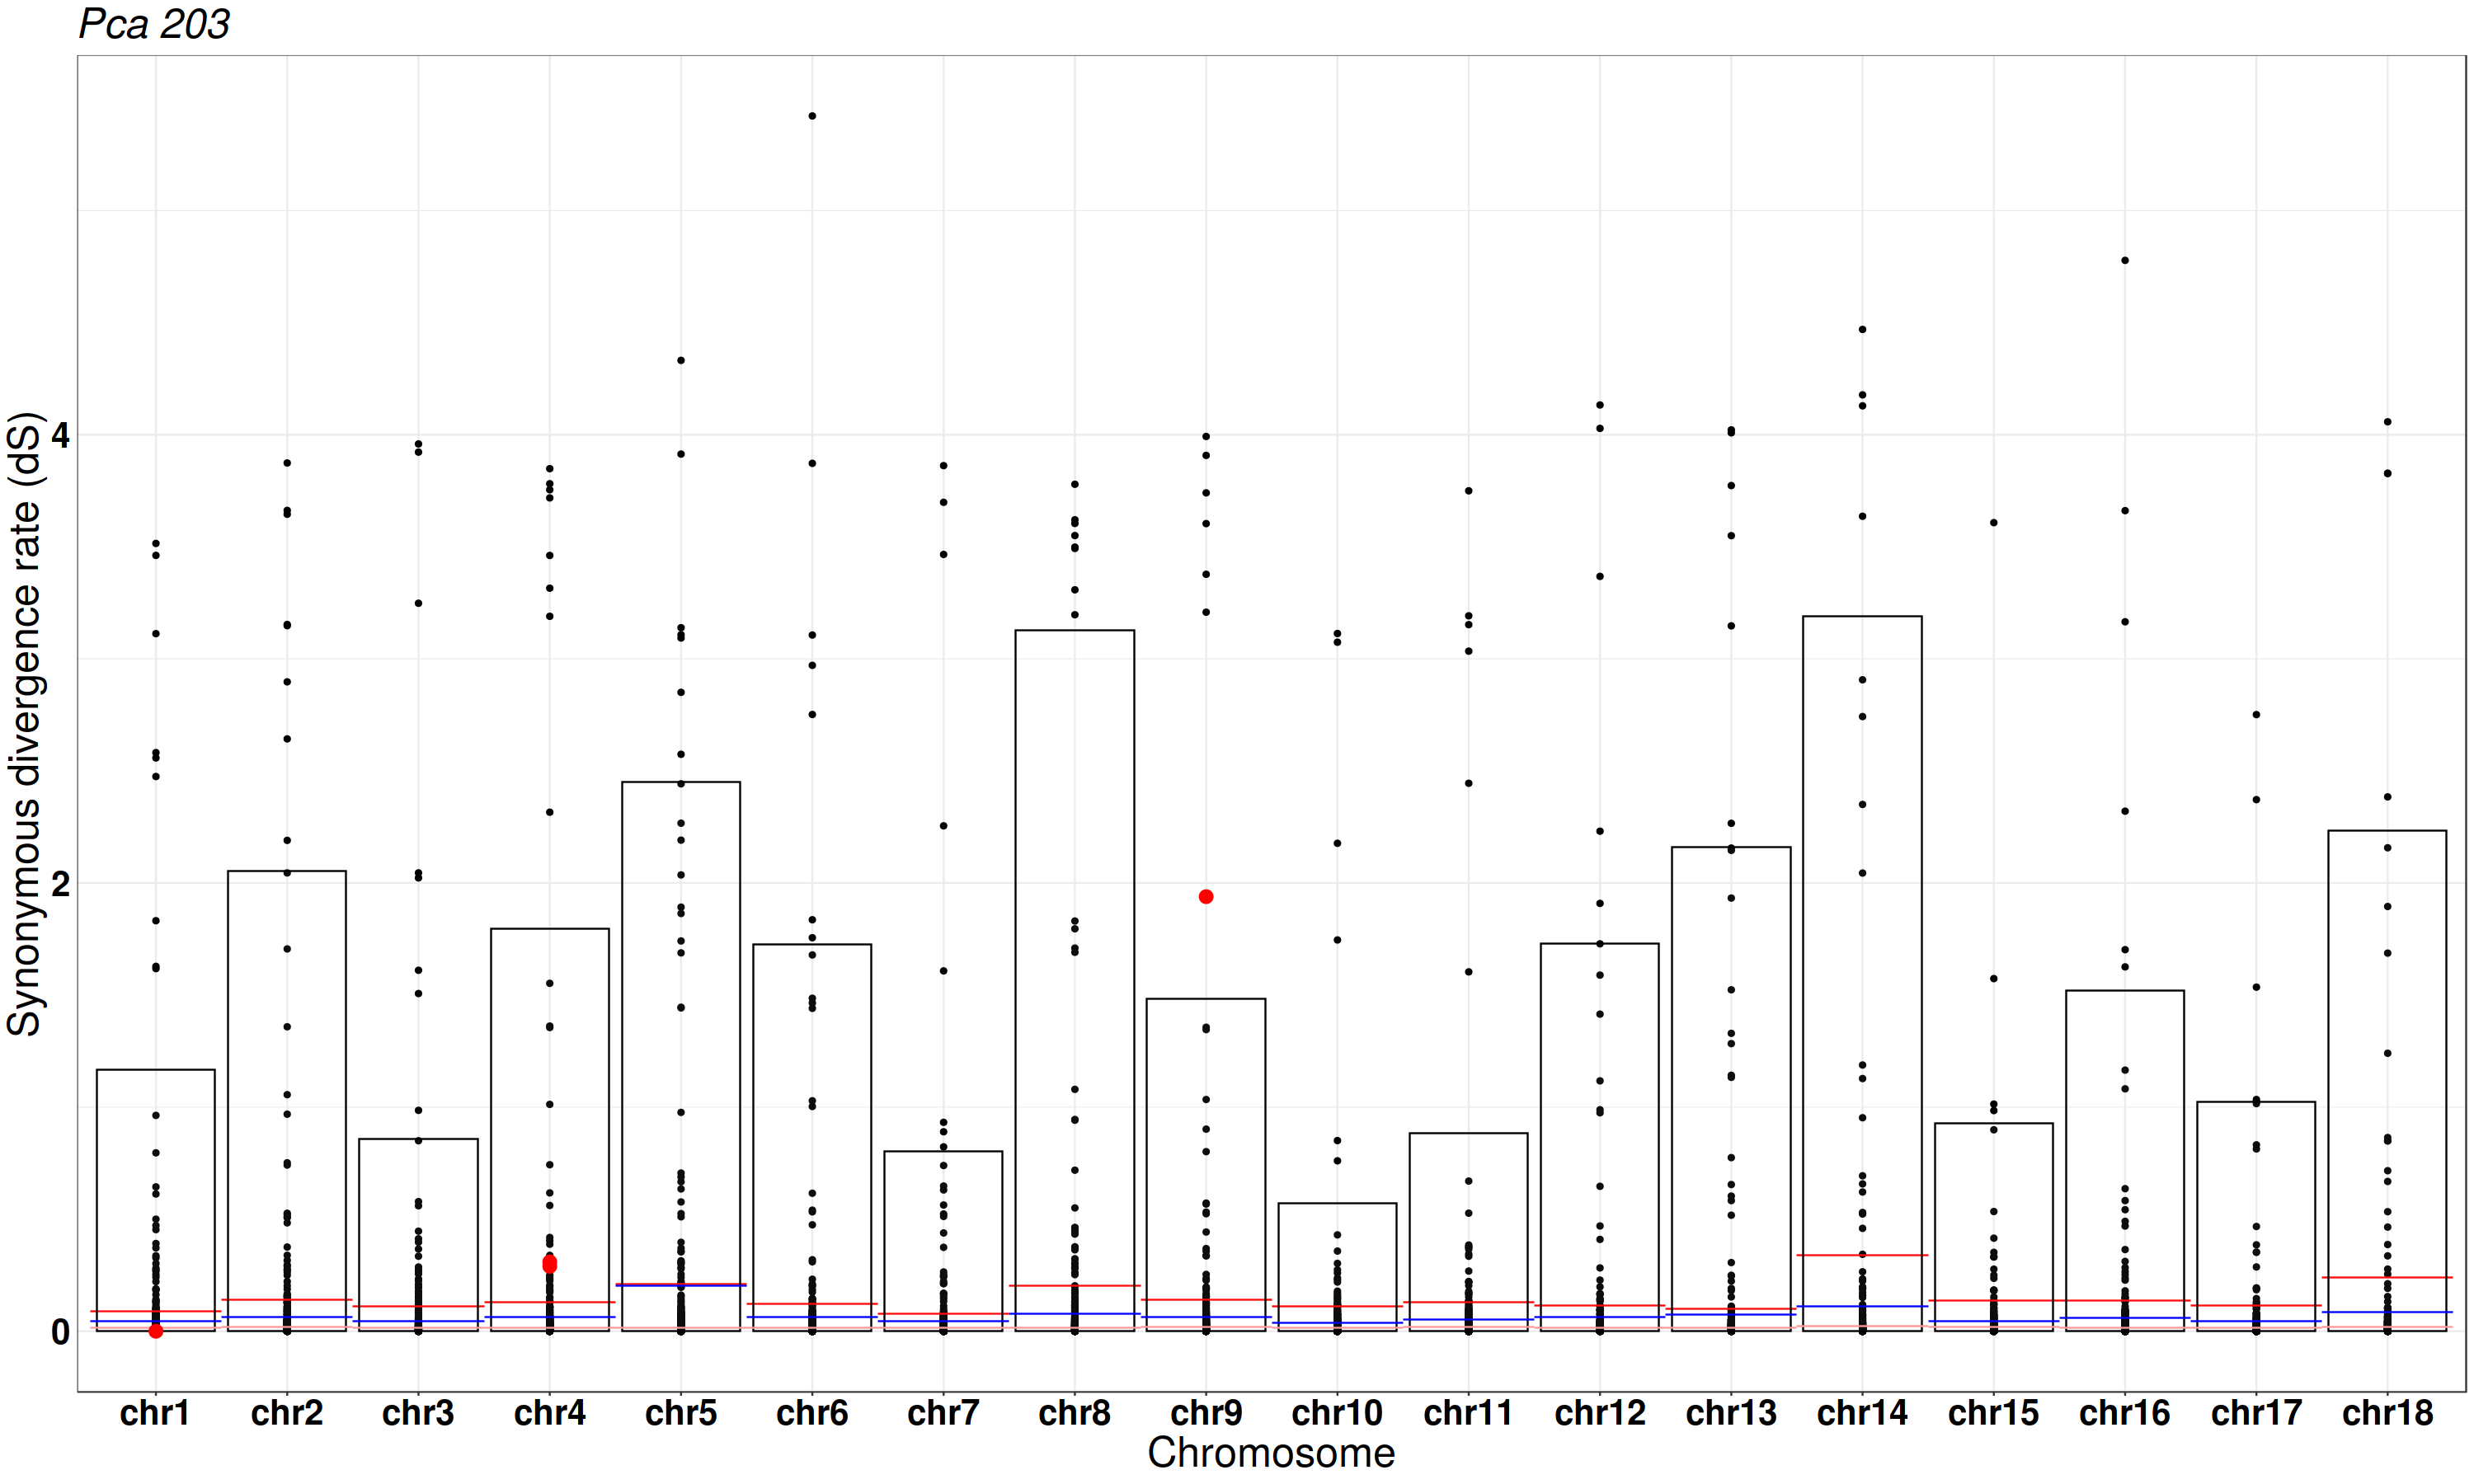

In [275]:
levels(Pca203_summary$Contig) <- sub("A", "", levels(Pca203_summary$Contig))
levels(Pca203_ds_table$Contig) <- sub("A", "", levels(Pca203_ds_table$Contig))
mylist <-""
for (i in seq(1, 18, by=1)){
    tmp1<- paste0("chr",i)
    mylist <- c(mylist, tmp1)
}
Pca203_summary<- Pca203_summary %>%
  mutate(Contig =  factor(Contig, levels = mylist)) %>%
  arrange(Contig) %>%
  mutate(xmin = seq(0.5, 17.5, by = 1)) %>%
  mutate(xmax = seq(1.5, 18.5, by = 1)) %>%
  mutate(ymin = seq(1, 18, by = 1)) 
Pca203_ds_table<-Pca203_ds_table %>%
  mutate(Contig =  factor(Contig, levels = mylist))
options(repr.plot.width=25, repr.plot.height=15)
ggplot(data = Pca203_ds_table[Pca203_ds_table$yn00_dS <80, ], aes(x = Contig, y = yn00_dS)) + geom_point(stat='identity', colour="black", fill="white") +
    geom_segment(data = Pca203_summary, aes(x = xmin, xend = xmax, y = get("95 quantile"), yend = get("95 quantile")), colour="#FF0000") +
#    geom_segment(data = Pca203_summary, aes(x = xmin, xend = xmax, y = get("99 quantile"), yend = get("99 quantile")), colour="#660000") +
    geom_bar(data = Pca203_summary, aes(x = Contig, y = get("99 quantile")), stat='identity', colour="black", alpha=0.05, fill="white") +
    geom_segment(data = Pca203_summary, aes(x = xmin, xend = xmax, y = get("75 quantile"), yend = get("75 quantile")), colour="#FF9999") + 
    geom_segment(data = Pca203_summary, aes(x = xmin, xend = xmax, y = mean, yend = mean), colour="#0000FF") + theme_bw()+ 
                    theme(text = element_text(size=30), legend.position=c(.99,.01), legend.justification=c(1,0),
                     strip.background=element_blank(), axis.ticks.y=element_blank(),
                        axis.text.x = element_text(size=25, face="bold", colour = "black"),
                        axis.text.y = element_text(size=25, face="bold", colour = "black"),
                         plot.title = element_text(color="black", size=30, face = "italic"))+
        ggtitle("Pca 203") + labs(x = "Chromosome", y = "Synonymous divergence rate (dS)")  +
        annotate(geom = "point", y =Pca203_ds_table[Pca203_ds_table$Query == "Pca203_021773",]$yn00_dS , x=Pca203_ds_table[Pca203_ds_table$Query == "Pca203_021773",]$Contig, colour="red", size=4)+
        annotate(geom = "point", y =Pca203_ds_table[Pca203_ds_table$Query == "Pca203_021774",]$yn00_dS , x=Pca203_ds_table[Pca203_ds_table$Query == "Pca203_021774",]$Contig, colour="red", size=4)+
        annotate(geom = "point", y =Pca203_ds_table[Pca203_ds_table$Query == "Pca203_012718",]$yn00_dS , x=Pca203_ds_table[Pca203_ds_table$Query == "Pca203_012718",]$Contig, colour="red", size=4)+
        annotate(geom = "point", y =Pca203_ds_table[Pca203_ds_table$Query == "Pca203_001648",]$yn00_dS , x=Pca203_ds_table[Pca203_ds_table$Query == "Pca203_001648",]$Contig, colour="red", size=4)
